### Group Project - Group # 3

We have selected the 'Bank_marketing' data from https://archive.ics.uci.edu/dataset/222/bank+marketing for our Group Project and to build model with analysis.

Following are the data variables given as dataframe
   # bank client data:

 Input variables:  
  * 1 - age (numeric)
  * 2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
  * 3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
  * 4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
  * 5 - default: has credit in default? (categorical: "no","yes","unknown")
  * 6 - housing: has housing loan? (categorical: "no","yes","unknown")
  * 7 - loan: has personal loan? (categorical: "no","yes","unknown")
  * 8 - contact: contact communication type (categorical: "cellular","telephone") 
  * 9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  * 10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  * 11 - duration: last contact duration, in seconds (numeric).
  * 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  * 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  * 14 - previous: number of contacts performed before this campaign and for this client (numeric)
  * 15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
  * 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  * 17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  * 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  * 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  * 20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
  * 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


In [3]:
# solve ssl issue
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

### Importing libraries

For this analysis, we are importing Pandas, numpy and matplotlib and Seaborn to analyze and visualize our data. This will help us identify data issues, find insights, and visualize any patterns or trends.

### Reading the File

We are  reading the file directly from a public GitHub repository. 

In [4]:
#Step 1: import libraries and dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/hwong019/mban_proj/main/bank-additional-full.csv?token=GHSAT0AAAAAACEYIKTJ53GWHYJ46T4LTIVMZGOJHWQ", sep=';')

### Assessing the DataFrame

We have used the head() function to get a sense of data
* In this case, we see that we have mostly categorical columns like Job, marital status, education,default, housing, loan, contact, month, day_of_week etc
* Duration of telemarkting call is also added as part of data set
* We also have numerical columns like emp.var.rate , cons.price.idx , cons.conf.idx, euribor3m	, nr.employed, age, duration, campaign, pdays, previous
* Last column we have 'y' highlitghting if customer got 'Fixed Deposit'

* there is 'unknown' can be seen in 'dafualt' column , we need to check data if there is any other 'unknown' exisit or any null value are present in dataset

In [5]:
#Step 2: Preliminary view of the data

df.head().transpose()

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [6]:
# count how many columns are there in the dataset
len(df.columns)

21

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

* from above table it is noted that there 41188 rows with mix of object, float and integer data type
* from info it is idetntified that there is no null value available in data.
* Data type for each filed is identified

* from below code we identified there are various unknown available in different column
* this also provide us the unique list associate with each columns

In [ ]:
df1 = pd.DataFrame(df)
for column in df1.columns:
    unique_values = df1[column].unique()
    print(f"Unique values in {column}: {unique_values}")

<Axes: xlabel='y', ylabel='Count'>

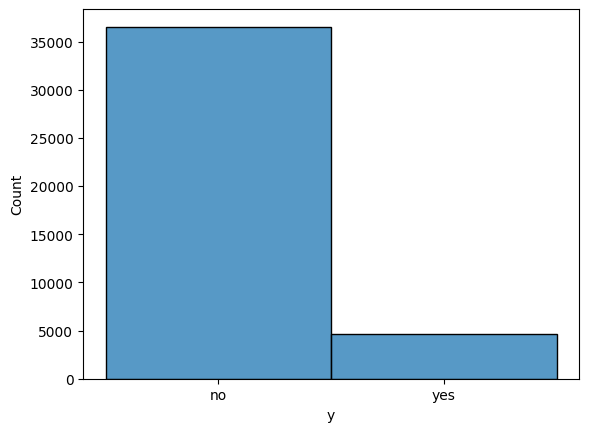

In [8]:
# The below histogram shows that the target value is imbalance and hence sampling technique need to be applied in the model design.
sns.histplot(data=df, x='y')

From below code we identifed that there are 12 rows are duplicated out of 41188 data points after dropping duplicate rows  we have 41176 rows

In [9]:
# chec if contains duplicated rows
df.duplicated().sum()

12

In [10]:
# to check how many records are there in the dataset
len(df)

41188

In [11]:
# Check if there is any duplicate data and drop them
df[df.duplicated()]

# Proceed to drop due to immateiral number of records (<1%)
df.drop_duplicates(inplace=True)

In [12]:
len(df)

41176

* Through below code we identified how many unknown are in each column
* Total unknowns  for each column identified are Job = 330, marital =80, education =1731, default= 8597 , housing =990 and loan 990.

In [13]:
#check how many unknown values in each column
#for col in df.columns:
#   print(col, df[col].isin(['unknown']).sum())

unknown_counts = df.apply(lambda x: x.eq('unknown').sum())
print(unknown_counts)

age 0
job 330
marital 80
education 1730
default 8596
housing 990
loan 990
contact 0
month 0
day_of_week 0
duration 0
campaign 0
pdays 0
previous 0
poutcome 0
emp.var.rate 0
cons.price.idx 0
cons.conf.idx 0
euribor3m 0
nr.employed 0
y 0


* Trying to identify how many 'unknown' are 'y' in each identified columns, to decide data cleaning strtaegy
* it is noted from the below output 
    - job has 37 yes tagged as 'unknown' out of 330
    - marital has 12 yes tagged as 'unknown' out of 80
    - education has 251 yes tagged as 'unknown' out of 1731
    - default has 443 yes tagged as 'unknown' out of 8597 , we also identified that there are only 3 default are marked as yes
    - housing has 107 yes tagged as 'unknown' out of 990
    - loan has 107 yes tagged as 'unknown' out of 990

    individually each column data based on overall data point are mostly < 1% except default 'unknown which is 1.08% , however to decide our strategy for 'unknown' we need to further anlayze

In [ ]:
# Pivot for the 'job' and 'y' columns
df1 = pd.DataFrame(df)
pivot_table = pd.pivot_table(df1, index=['job', 'y'], aggfunc='size')
stacked_df = pivot_table.unstack()
print(stacked_df)

In [ ]:
# Pivot for the 'marital' and 'y' columns
df1 = pd.DataFrame(df)
pivot_table = pd.pivot_table(df1, index=['marital', 'y'], aggfunc='size')
stacked_df = pivot_table.unstack()
print(stacked_df)

In [ ]:
# Pivot for the 'education' and 'y' columns
df1 = pd.DataFrame(df)
pivot_table = pd.pivot_table(df1, index=['education', 'y'], aggfunc='size')
stacked_df = pivot_table.unstack()
print(stacked_df)

In [ ]:
# Pivot for the 'default' and 'y' columns
df1 = pd.DataFrame(df)
pivot_table = pd.pivot_table(df1, index=['default', 'y'], aggfunc='size')
stacked_df = pivot_table.unstack()
print(stacked_df)

In [ ]:
# Pivot for the 'housing' and 'y' columns
df1 = pd.DataFrame(df)
pivot_table = pd.pivot_table(df1, index=['housing', 'y'], aggfunc='size')
stacked_df = pivot_table.unstack()
print(stacked_df)

In [ ]:
# Pivot for the 'loan' and 'y' columns
df1 = pd.DataFrame(df)
pivot_table = pd.pivot_table(df1, index=['loan', 'y'], aggfunc='size')
stacked_df = pivot_table.unstack()
print(stacked_df)

In [ ]:
# Identify rows with 'unknown' in multiple columns
unknown_rows = df[df['job'].isin(['unknown']) & 
                  df['marital'].isin(['unknown']) & 
                  df['education'].isin(['unknown']) & 
                  df['default'].isin(['unknown']) &
                  df['housing'].isin(['unknown']) &
                  df['loan'].isin(['unknown'])]
print(unknown_rows)

#Segregating Categorical & Numerical variables

In [14]:
# Split the features between catgorical and numerical
categorical = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
numerical = ['age','duration', 'campaign','pdays','previous','emp.var.rate','cons.conf.idx','euribor3m','nr.employed']
target = 'y'

# Check the number of 'unknown variable'
#for i in categorical:
#    print(i)
#    print(len(df[df[i]=='unknown']))

unknown_counts = df.apply(lambda x: x.eq('unknown').sum())
print(unknown_counts)

job
330
marital
80
education
1730
default
8596
housing
990
loan
990
contact
0
month
0
day_of_week
0
poutcome
0


Further analyzing 'job' column to understand data distribution  across various job types and unknown

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'housemaid'),
  Text(1, 0, 'services'),
  Text(2, 0, 'admin.'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'technician'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'management'),
  Text(7, 0, 'unemployed'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unknown'),
  Text(10, 0, 'entrepreneur'),
  Text(11, 0, 'student')])

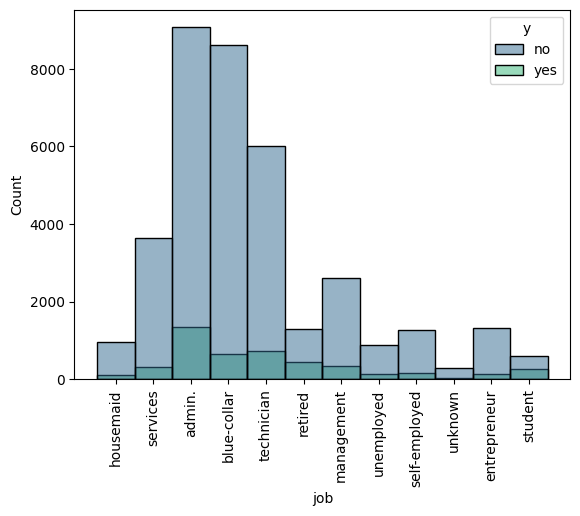

In [15]:
# Check if the unknown job data would have lots of positive target value
sns.histplot(data=df, x='job', hue='y', palette='viridis')
plt.xticks(rotation=90)

([0, 1, 2, 3],
 [Text(0, 0, 'married'),
  Text(1, 0, 'single'),
  Text(2, 0, 'divorced'),
  Text(3, 0, 'unknown')])

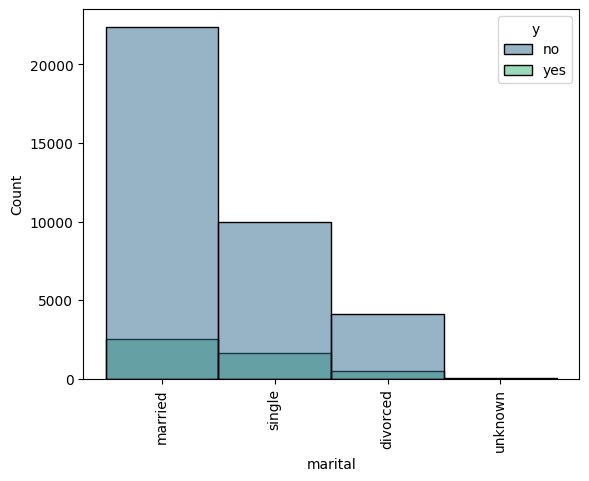

In [16]:
# Check if the unknown marital data would have lots of positive target value
sns.histplot(data=df, x='marital', hue='y', palette='viridis')
plt.xticks(rotation=90)

In [17]:
# count the distribution of the default column
df.groupby('default')['default'].count()

default
no         32577
unknown     8596
yes            3
Name: default, dtype: int64

In [18]:
# Unknown value for job and marital are immaterial, hence proposed to drop them
# Default, housing and loan are impute as no first. For default column, it will be dropped subsequently due to limited case of default.
# education remain as unknown category

df.drop(df[(df['job'] == 'unknown') | (df['marital'] == 'unknown')].index, inplace=True)
df['default'] = df['default'].apply(lambda x: 'no' if x == 'unknown' else x)
df['housing'] = df['housing'].apply(lambda x: 'no' if x == 'unknown' else x)
df['loan'] = df['loan'].apply(lambda x: 'no' if x == 'unknown' else x)

In [19]:
# Imputation for education
# summarize the most frequent education level by job
job_mapping = df.groupby('job')['education'].apply(lambda x: x.mode().iloc[0])
# transform the summary to dictionary
job_mapping_dict = job_mapping.to_dict()
# apply the mapping to the unknown value
df['education'] = df.apply(lambda row: job_mapping_dict[row['job']] if (row['education'] == 'unknown') else row['education'], axis=1)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'basic.4y'),
  Text(1, 0, 'high.school'),
  Text(2, 0, 'basic.6y'),
  Text(3, 0, 'basic.9y'),
  Text(4, 0, 'professional.course'),
  Text(5, 0, 'university.degree'),
  Text(6, 0, 'illiterate')])

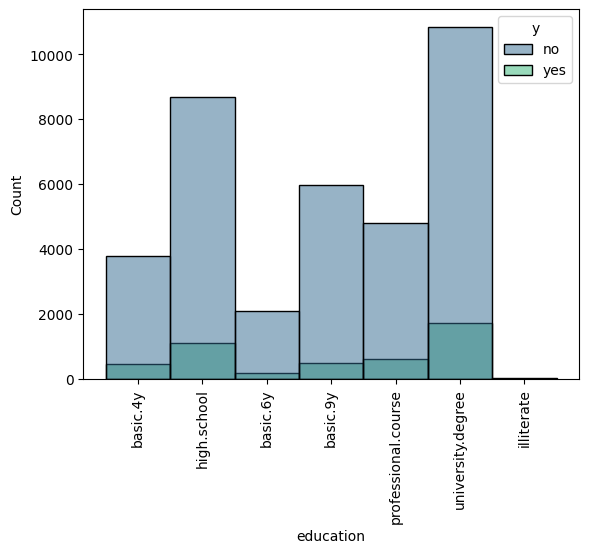

In [20]:
# Check if the imputation of education level
sns.histplot(data=df, x='education', hue='y', palette='viridis')
plt.xticks(rotation=90)

In [21]:
# Review the numerical details
df[numerical].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.conf.idx,euribor3m,nr.employed
count,40775.000000,40775.000000,40775.000000,40775.000000,40775.000000,40775.000000,40775.000000,40775.000000,40775.000000
mean,39.978541,258.360932,2.566401,962.714752,0.172925,0.080552,-40.516039,3.619534,5167.016809
std,10.401573,259.295917,2.768411,186.319804,0.494927,1.570054,4.626463,1.734406,72.231672
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,-41.800000,4.857000,5191.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,-26.900000,5.045000,5228.100000


In [22]:
len(df[df['campaign']>10])

857

<Axes: xlabel='pdays', ylabel='Count'>

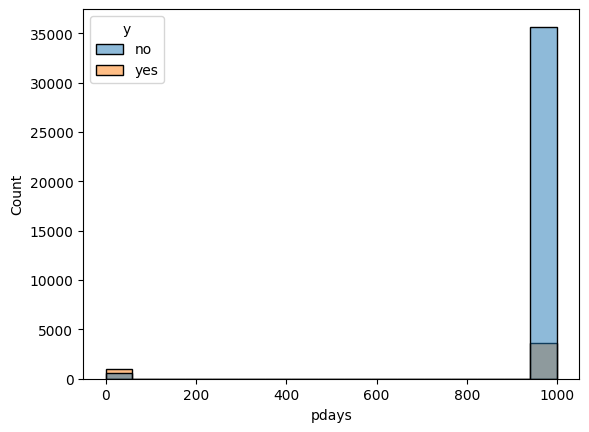

In [23]:
sns.histplot(data=df, x='pdays', hue='y')

<Axes: xlabel='previous', ylabel='y'>

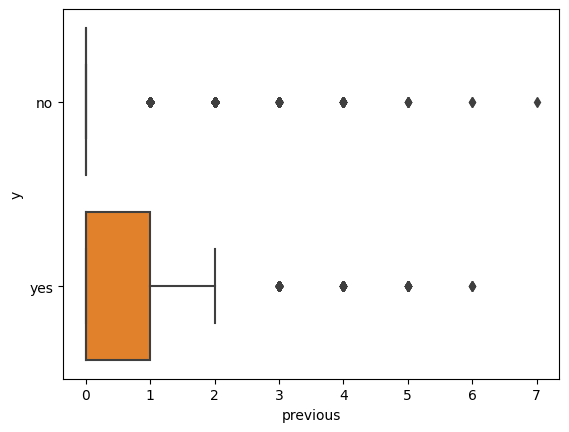

In [24]:
sns.boxplot(data=df, x='previous', y='y')

In [25]:
# drop the duration since it is not known until the call was done
# clear the outliers of campaign since it is not reasonable to call mutliple times in the same campaign (use 10 as a reference based on mean + 3 s.d.)
# drop the pdays column since majority of the value is 999

df.drop(['duration'], axis=1, inplace=True)
df.drop((df[df['campaign'] > (df['campaign'].mean() + 3 * np.std(df['campaign']))]).index, axis=0, inplace=True)


In [26]:
# update the list of numerical value
numerical = ['campaign','previous','pdays','emp.var.rate','cons.conf.idx','euribor3m','nr.employed']
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,39918.000000,39918.000000,39918.000000,39918.000000,39918.000000,39918.000000,39918.000000,39918.000000,39918.000000
mean,39.970264,2.273436,961.985220,0.176362,0.057638,93.567189,-40.516767,3.595980,5166.018182
std,10.417499,1.715742,188.112514,0.499277,1.574721,0.579003,4.650715,1.740739,72.503011
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,10.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


array([[1.       , 0.9057189],
       [0.9057189, 1.       ]])

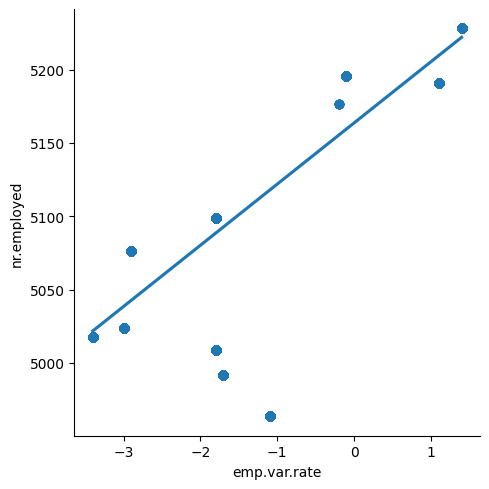

In [27]:
# review the relationship between emp.var.rate and nr.employed
sns.lmplot(data=df, x='emp.var.rate', y='nr.employed')
np.corrcoef(df['emp.var.rate'],df['nr.employed'])

In [28]:
# high relationship between nr.employed and emp.var.rate, hence suggest to remove nr.employed to avoid duplication of features
df.drop(['nr.employed'], axis=1, inplace=True)
numerical = ['age','campaign','previous','pdays','emp.var.rate','cons.conf.idx','euribor3m']
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
count,39918.000000,39918.000000,39918.000000,39918.000000,39918.000000,39918.000000,39918.000000,39918.000000
mean,39.970264,2.273436,961.985220,0.176362,0.057638,93.567189,-40.516767,3.595980
std,10.417499,1.715742,188.112514,0.499277,1.574721,0.579003,4.650715,1.740739
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000
max,98.000000,10.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000


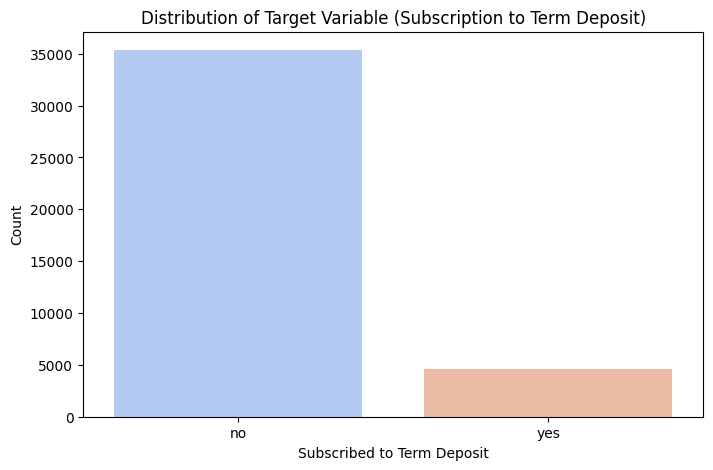

In [29]:
# target variable: y
plt.figure(figsize=(8, 5))
sns.countplot(x='y', data=df, palette="coolwarm")
plt.title('Distribution of Target Variable (Subscription to Term Deposit)')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Count')
plt.show()

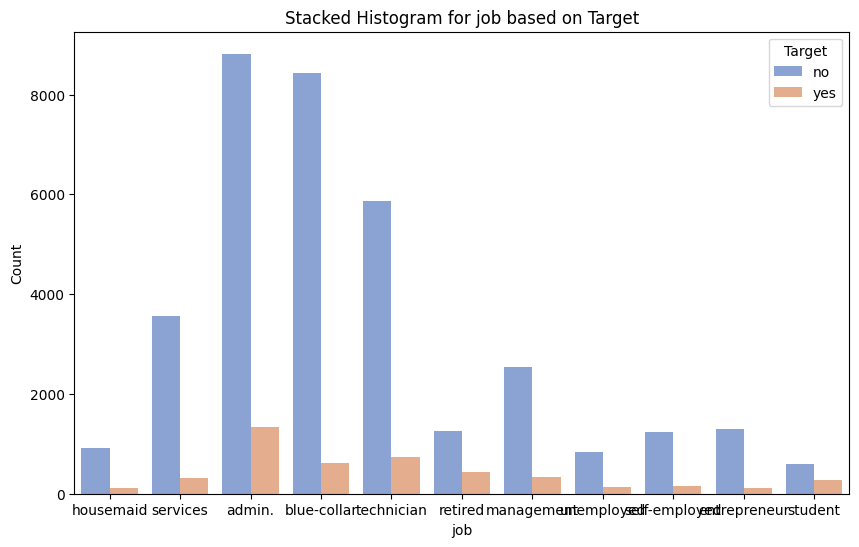

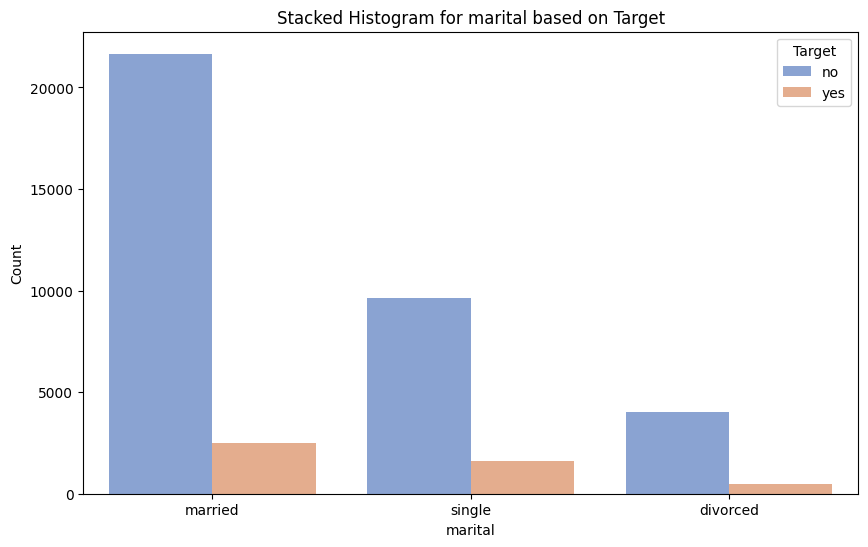

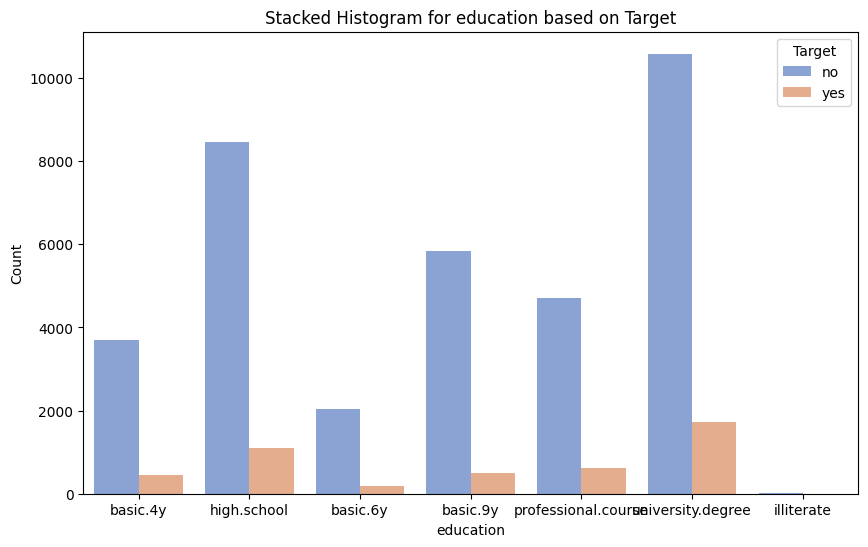

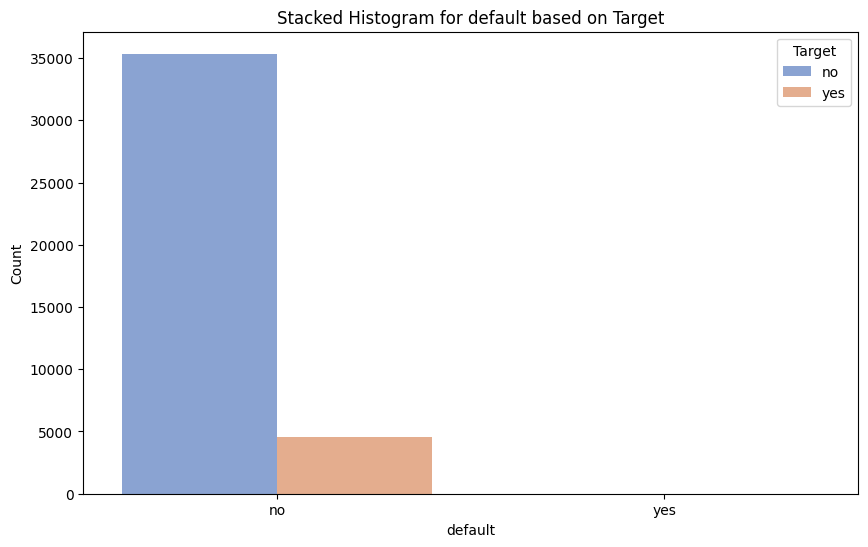

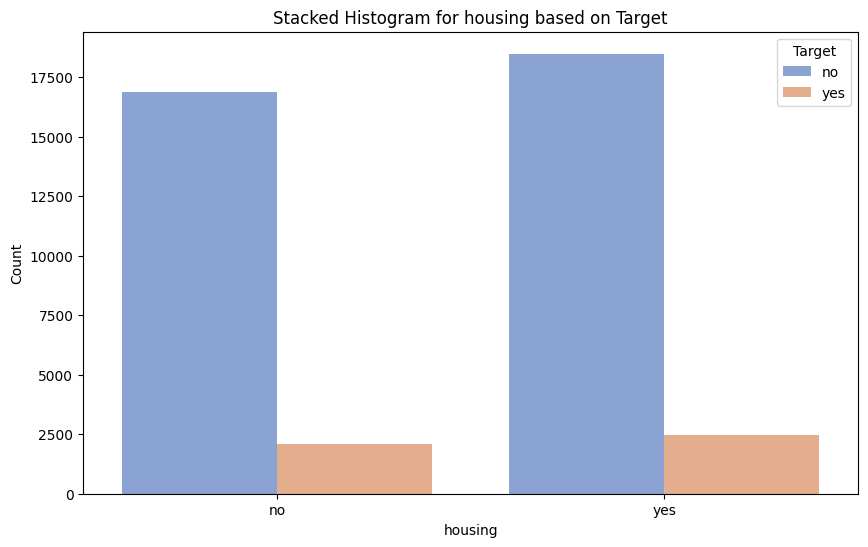

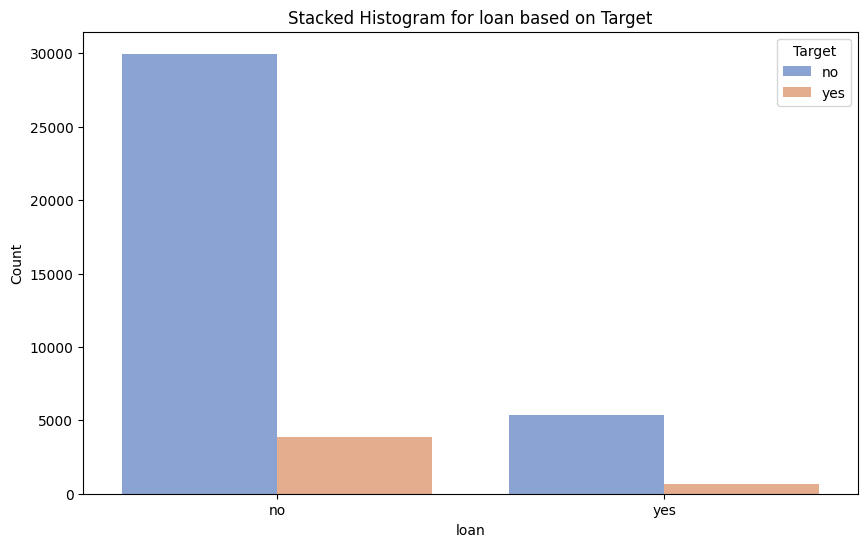

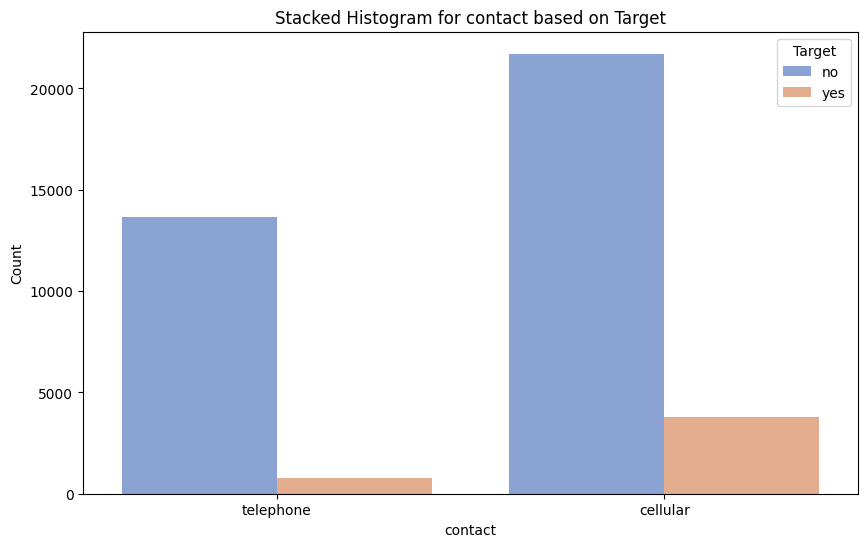

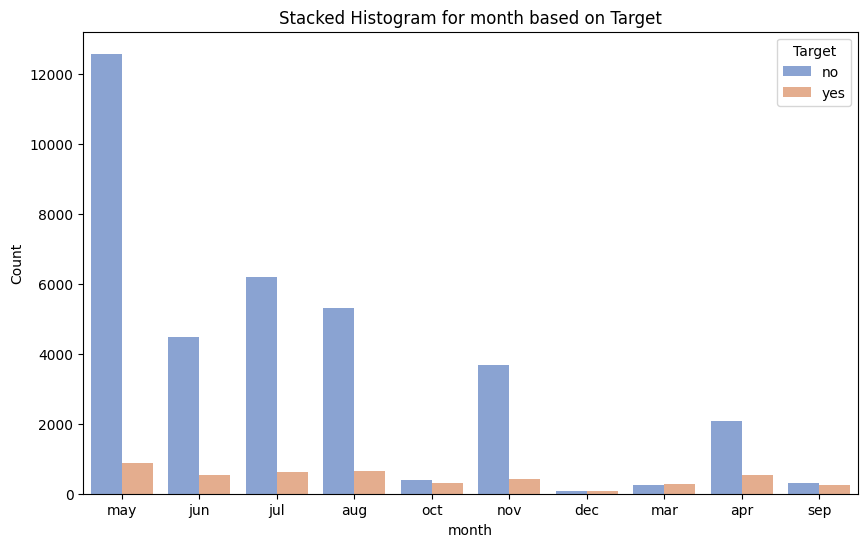

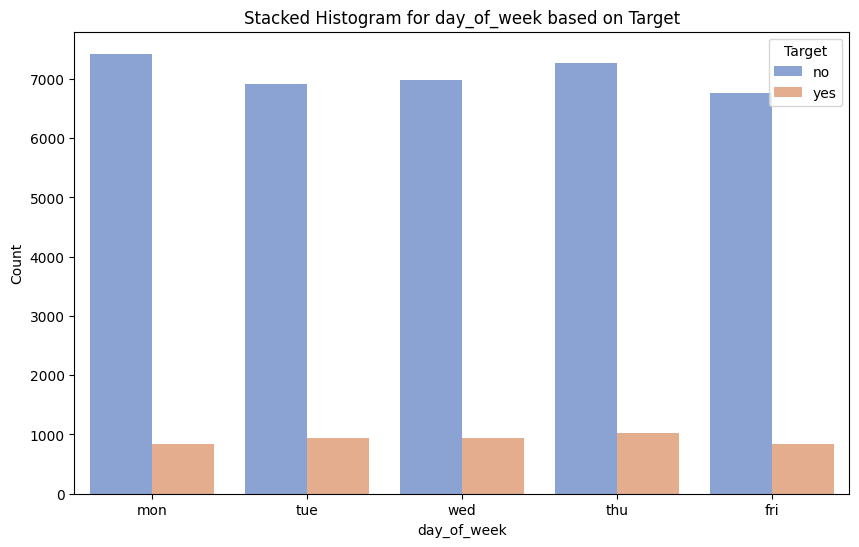

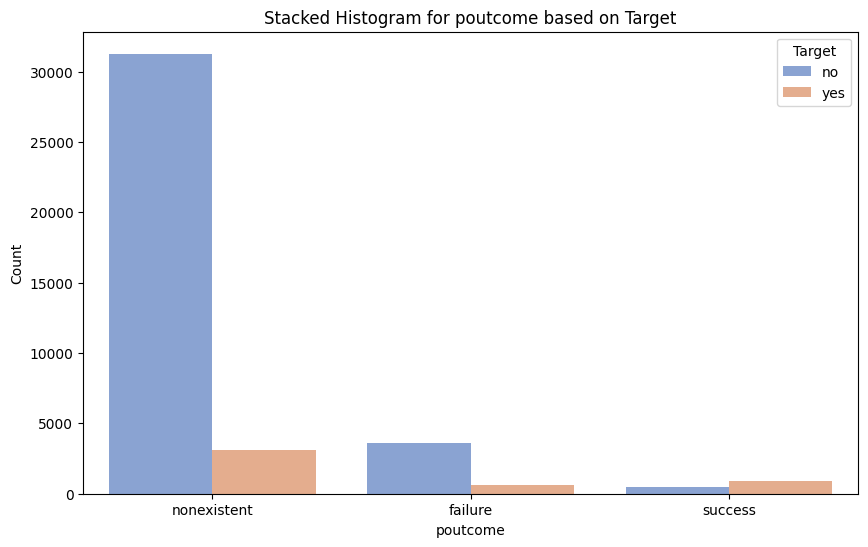

In [30]:
# plot histogram for categorical variable

for var in categorical:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=var, data=df, hue=target, palette='muted', alpha=0.7)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'Stacked Histogram for {var} based on Target')
    plt.legend(title='Target', loc='upper right')
    plt.show()

The above analysis indicate that the success rate has less dependency on the day_of_week and existence of housing loan as they're distributed uniformly acorss the categorical values. Remove default columns since there is only three default cases.  Further, if the clients default, the bank will be benefited from taking deposits to them to reduce the overall credit exposures. Hence, default is less relevant in the term desposit subscription scenario.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


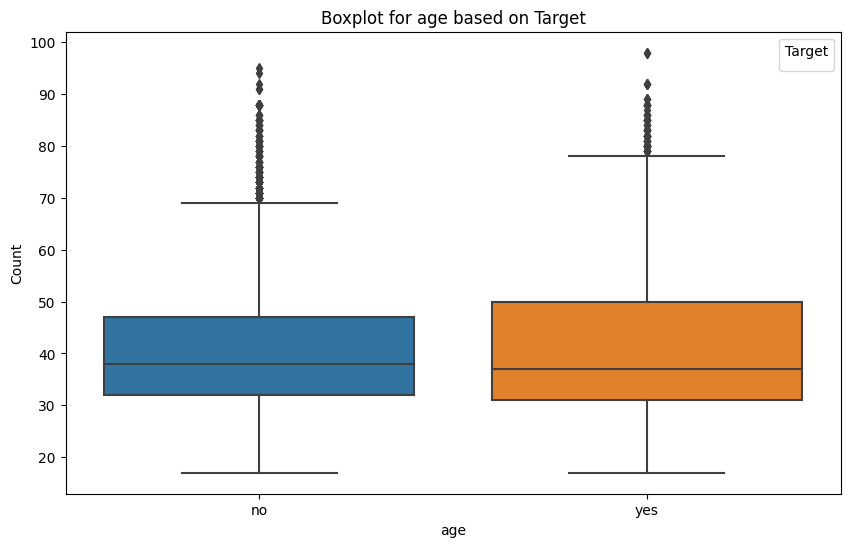

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


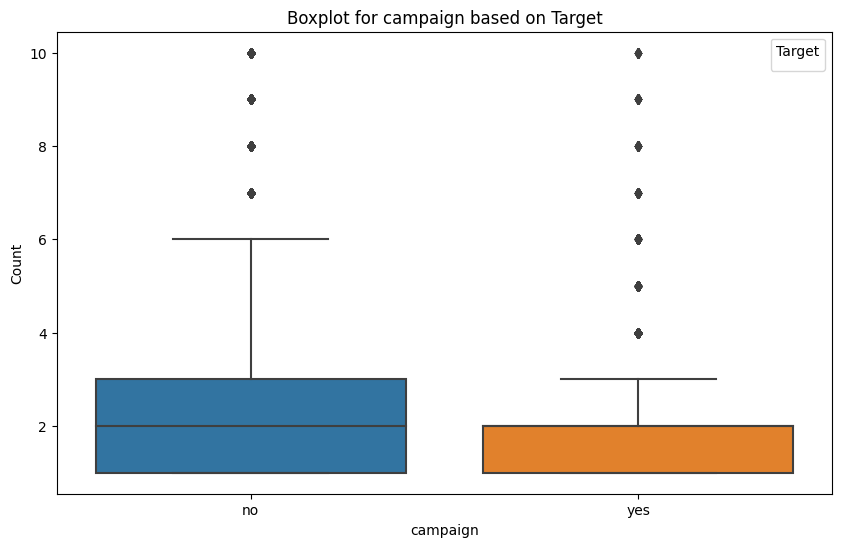

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


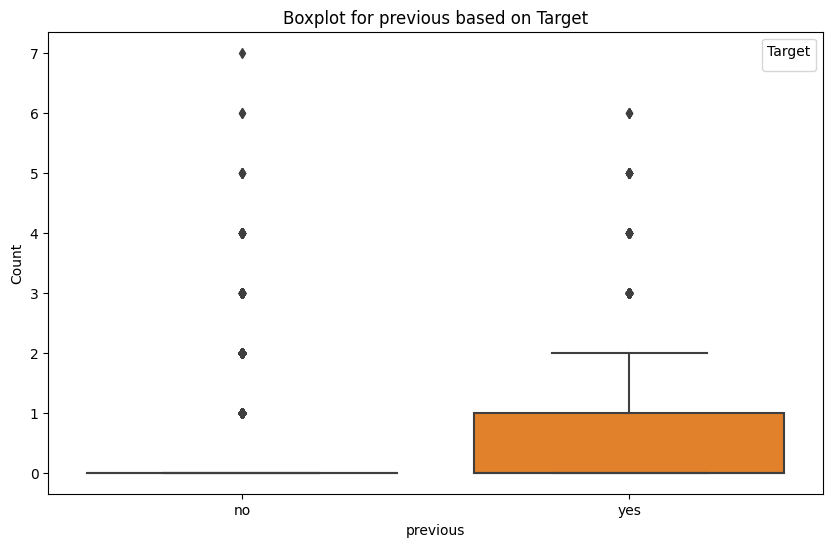

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


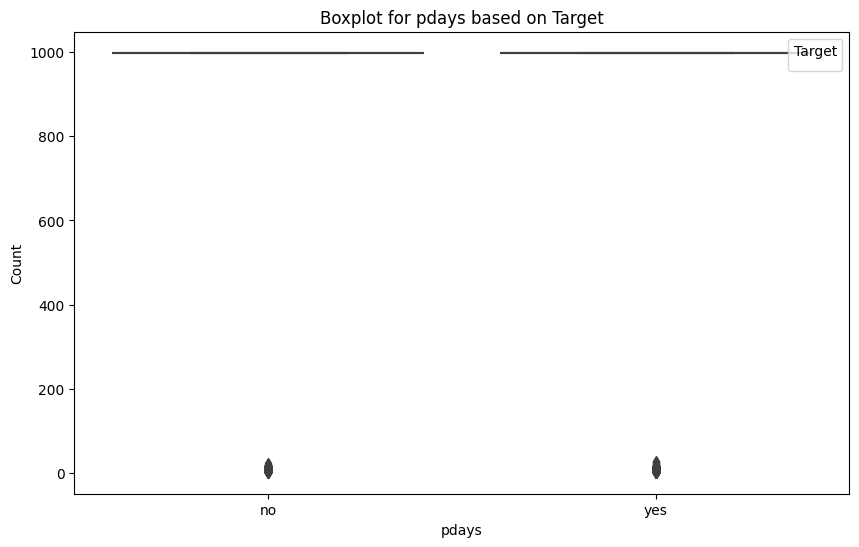

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


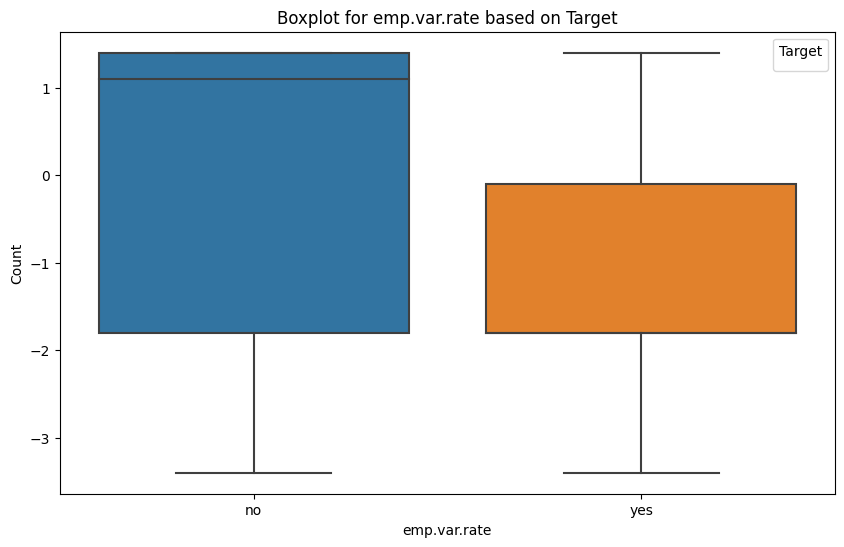

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


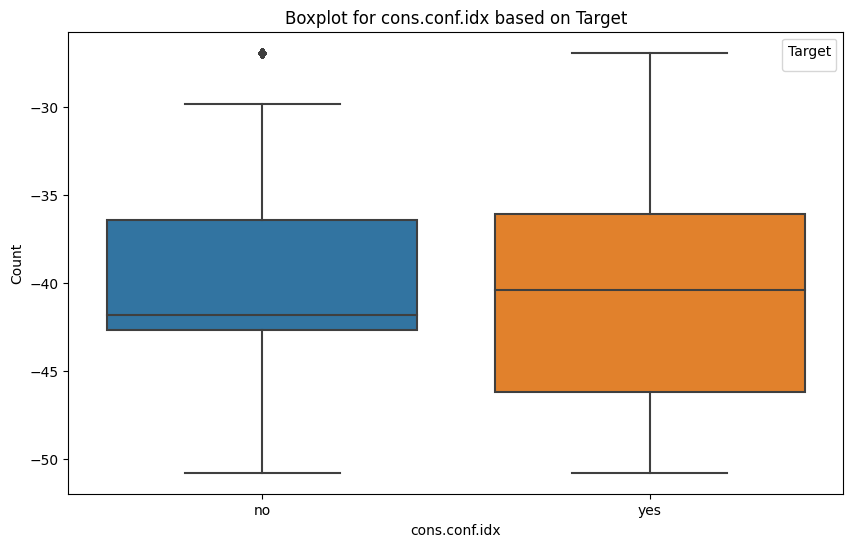

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


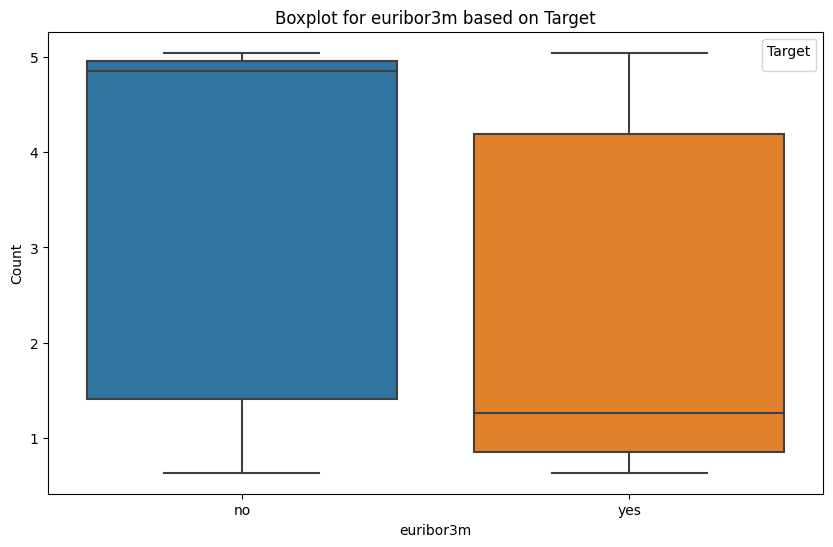

In [31]:
for var in numerical:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=target, data=df, y=var)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'Boxplot for {var} based on Target')
    plt.legend(title='Target', loc='upper right')
    plt.show()

0.11440953955608998

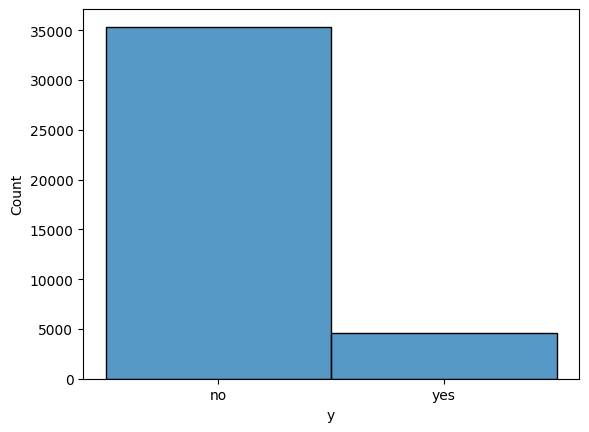

In [32]:
# check the imbalance of target variable (11% of the data only)

sns.histplot(data=df, x='y')
(df['y']=='yes').sum() / ((df['y']=='yes').sum() + (df['y']=='no').sum())

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'emp.var.rate'}>,
        <Axes: title={'center': 'cons.price.idx'}>],
       [<Axes: title={'center': 'cons.conf.idx'}>,
        <Axes: title={'center': 'euribor3m'}>, <Axes: >]], dtype=object)

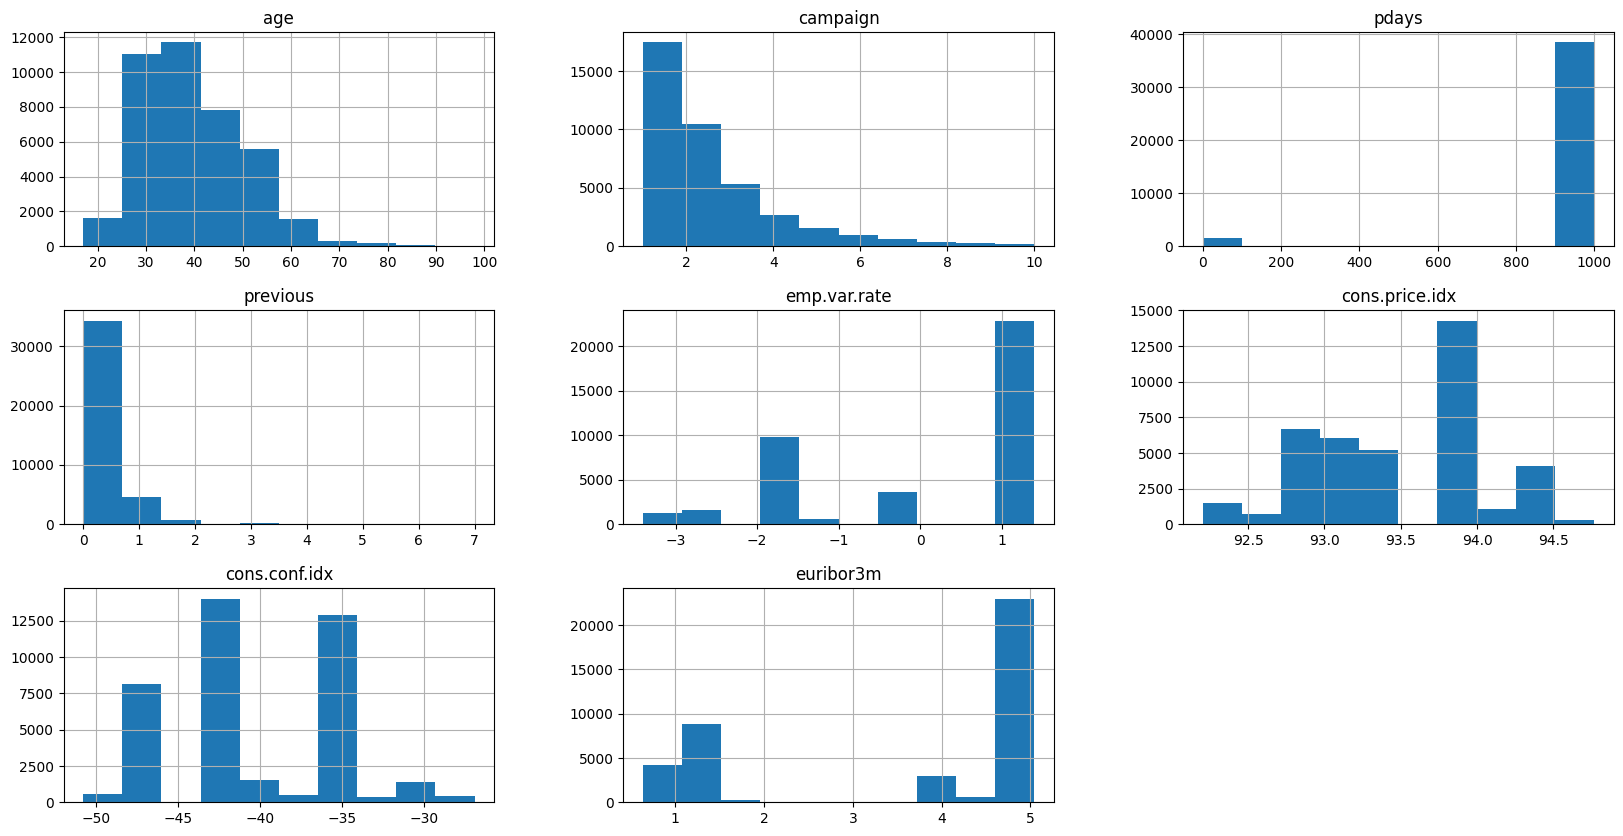

In [33]:
# see distribution for all numeric variables
df.hist(figsize=(20,10))

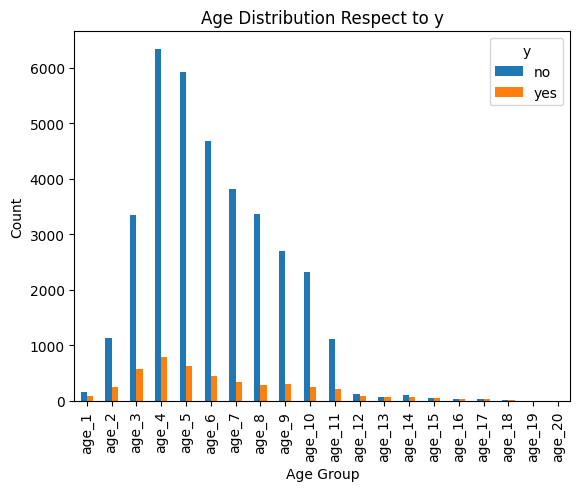

,min,max
age_group,,
age_1,17,21
age_2,22,25
age_3,26,29
age_4,30,33
age_5,34,37
age_6,38,41
age_7,42,45
age_8,46,49
age_9,50,53


In [34]:
# divided the age to 10 groups
df_age = df.copy()
df_age['age_group'] = pd.cut(df_age['age'], bins=20)

# see the distribution of age respect to y
df_age['age_group'] = pd.cut(df_age['age'], bins=20, labels=['age_1', 'age_2', 'age_3', 'age_4', 'age_5', 'age_6', 'age_7', 'age_8', 'age_9', 'age_10', 'age_11', 'age_12', 'age_13', 'age_14', 'age_15', 'age_16', 'age_17', 'age_18', 'age_19', 'age_20'])
df_age.groupby('age_group')['y'].value_counts().unstack().plot.bar()
plt.title('Age Distribution Respect to y')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# a table to show each age group and assciated age range
df_age['age_group'] = pd.cut(df_age['age'], bins=20, labels=['age_1', 'age_2', 'age_3', 'age_4', 'age_5', 'age_6', 'age_7', 'age_8', 'age_9', 'age_10', 'age_11', 'age_12', 'age_13', 'age_14', 'age_15', 'age_16', 'age_17', 'age_18', 'age_19', 'age_20'])
df_age.groupby('age_group')['age'].agg(['min', 'max'])


<Axes: >

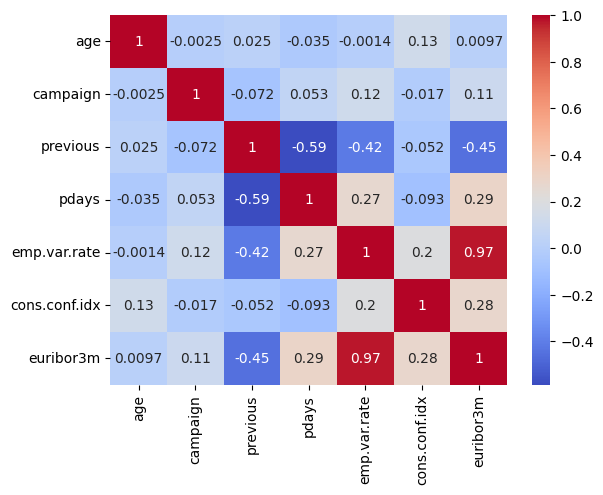

In [35]:
# a graph to see the corrlations between variables
sns.heatmap(df[numerical].corr(), annot=True, cmap='coolwarm')

The above heatmap shows that there is high correlation between emp.var.rate and euribor3m.  Thus, we'll incldue either one of them into our model.

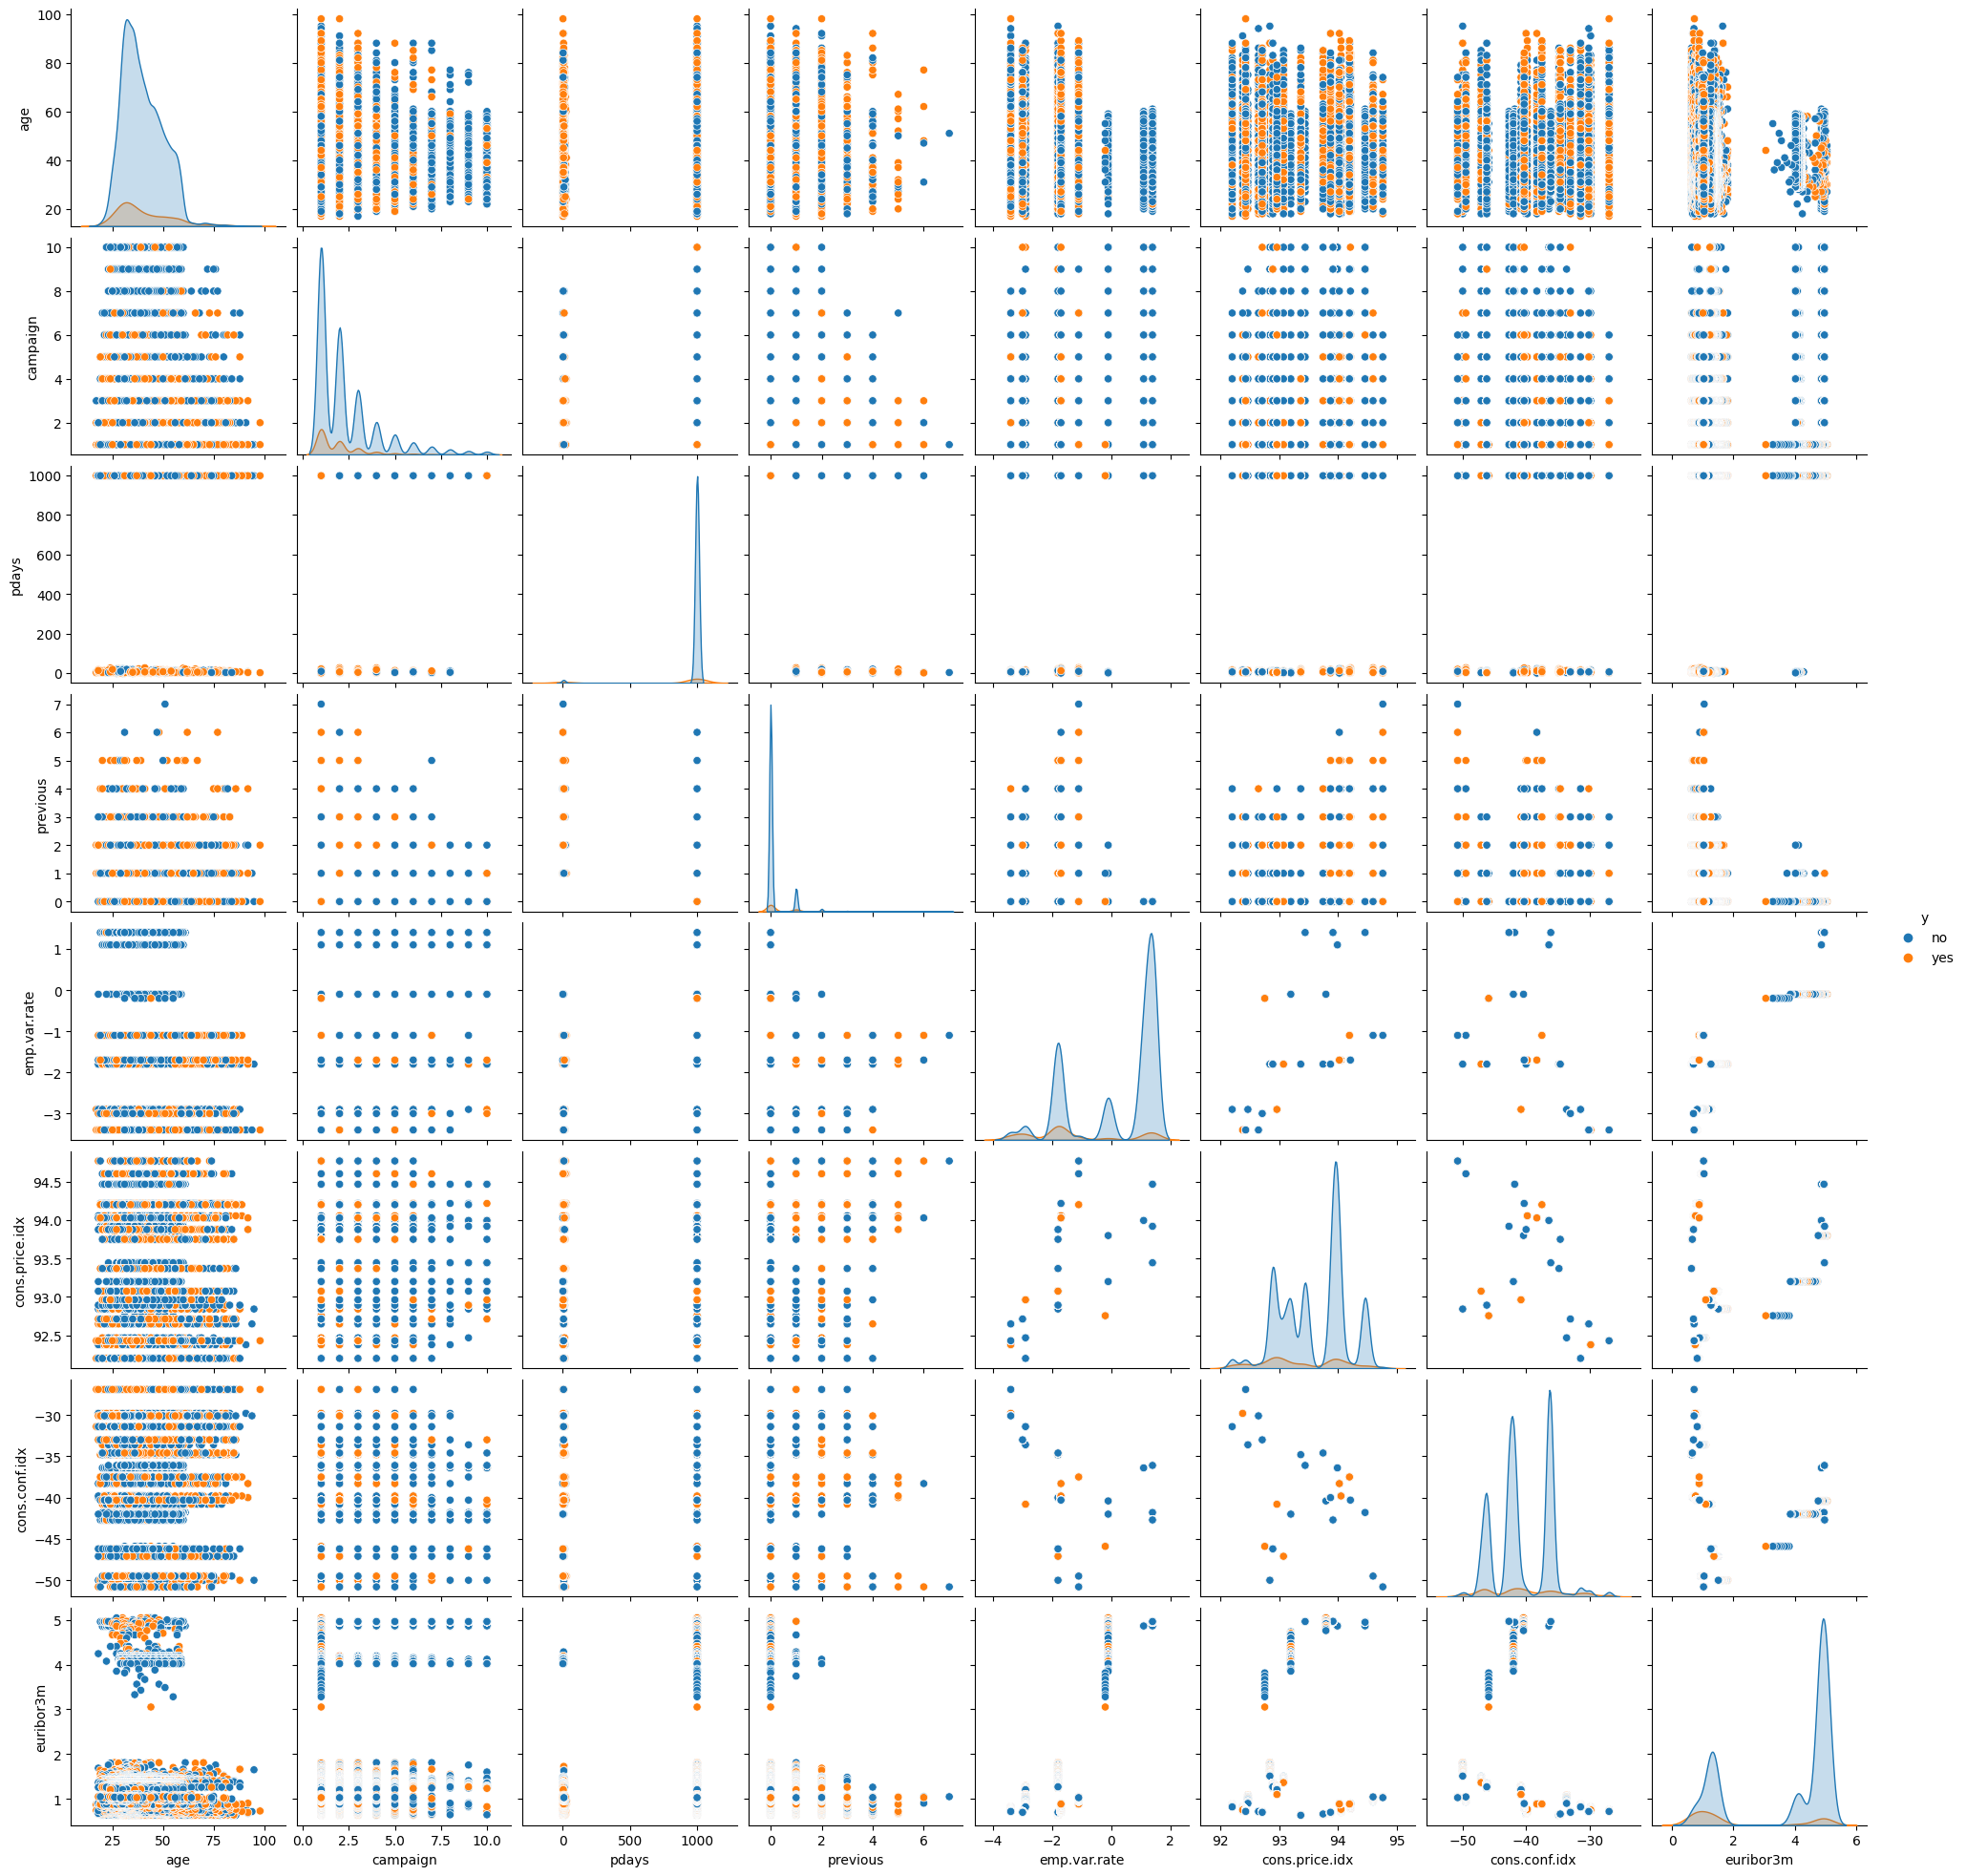

In [36]:
# More detailed exploration
sns.pairplot(df, hue=target)
plt.show()

# Below codes is to check the impact of removing certain unimprotant features based on the exploratory analysis above.

In [37]:
# Import vairous liabraries for machine learning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, classification_report
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

#### Results when including full list of features

In [38]:
# Summarize the various features used for model building
numerical = ['age','campaign','previous','pdays','emp.var.rate','cons.conf.idx','euribor3m']
categorical = ['job','marital','education','housing','loan','contact','month','day_of_week','poutcome']
target = 'y'

# Separate features and target
X = df[categorical + numerical]
y = df[target]

# Transform target variable to 1 and 0 using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# build pipeline
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical),
                                                 ('num', num_transformer, numerical)])

# Combine preprocessing and SMOTE in the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=1234))  # Include SMOTE in the pipeline
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Apply the pipeline on the training data
X_train_transformed, y_train_transformed = pipeline['smote'].fit_resample(pipeline['preprocessor'].fit_transform(X_train), y_train)
X_test_transformed = pipeline['preprocessor'].fit_transform(X_test)

# Build the LogisticRegression model
lr_model = LogisticRegression(max_iter=300)
lr_model.fit(X_train_transformed, y_train_transformed)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test_transformed)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.8113727454909819
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      7091
           1       0.33      0.66      0.44       893

    accuracy                           0.81      7984
   macro avg       0.64      0.75      0.66      7984
weighted avg       0.88      0.81      0.84      7984



#### Results when removing empvar (cumulative from above)

In [39]:
# Summarize the various features used for model building
numerical = ['age','campaign','previous','pdays','cons.conf.idx','euribor3m']
categorical = ['job','marital','education','housing','loan','contact','month','day_of_week','poutcome']
target = 'y'

# Separate features and target
X = df[categorical + numerical]
y = df[target]

# Transform target variable to 1 and 0 using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# build pipeline
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical),
                                                 ('num', num_transformer, numerical)])

# Combine preprocessing and SMOTE in the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=1234))  # Include SMOTE in the pipeline
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Apply the pipeline on the training data
X_train_transformed, y_train_transformed = pipeline['smote'].fit_resample(pipeline['preprocessor'].fit_transform(X_train), y_train)
X_test_transformed = pipeline['preprocessor'].fit_transform(X_test)

# Build the LogisticRegression model
lr_model = LogisticRegression(max_iter=300)
lr_model.fit(X_train_transformed, y_train_transformed)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test_transformed)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.811748496993988
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      7091
           1       0.33      0.66      0.44       893

    accuracy                           0.81      7984
   macro avg       0.64      0.75      0.66      7984
weighted avg       0.88      0.81      0.84      7984



#### Results when removing housing and day of week (cumulative from above)

In [40]:
# Summarize the various features used for model building
numerical = ['age','campaign','previous','pdays','cons.conf.idx','euribor3m']
categorical = ['job','marital','education','loan','contact','month','poutcome']
target = 'y'

# Separate features and target
X = df[categorical + numerical]
y = df[target]

# Transform target variable to 1 and 0 using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# build pipeline
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical),
                                                 ('num', num_transformer, numerical)])

# Combine preprocessing and SMOTE in the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=1234))  # Include SMOTE in the pipeline
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Apply the pipeline on the training data
X_train_transformed, y_train_transformed = pipeline['smote'].fit_resample(pipeline['preprocessor'].fit_transform(X_train), y_train)
X_test_transformed = pipeline['preprocessor'].fit_transform(X_test)

# Build the LogisticRegression model
lr_model = LogisticRegression(max_iter=300)
lr_model.fit(X_train_transformed, y_train_transformed)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test_transformed)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.8151302605210421
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      7091
           1       0.33      0.66      0.44       893

    accuracy                           0.82      7984
   macro avg       0.64      0.75      0.67      7984
weighted avg       0.88      0.82      0.84      7984



#### Results when pdays (cumulative from above)

In [41]:
# Summarize the various features used for model building
numerical = ['age','campaign','previous','cons.conf.idx','euribor3m']
categorical = ['job','marital','education','loan','contact','month','poutcome']
target = 'y'

# Separate features and target
X = df[categorical + numerical]
y = df[target]

# Transform target variable to 1 and 0 using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# build pipeline
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical),
                                                 ('num', num_transformer, numerical)])

# Combine preprocessing and SMOTE in the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=1234))  # Include SMOTE in the pipeline
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Apply the pipeline on the training data
X_train_transformed, y_train_transformed = pipeline['smote'].fit_resample(pipeline['preprocessor'].fit_transform(X_train), y_train)
X_test_transformed = pipeline['preprocessor'].fit_transform(X_test)

# Build the LogisticRegression model
lr_model = LogisticRegression(max_iter=300)
lr_model.fit(X_train_transformed, y_train_transformed)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test_transformed)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.8142535070140281
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      7091
           1       0.33      0.66      0.44       893

    accuracy                           0.81      7984
   macro avg       0.64      0.75      0.67      7984
weighted avg       0.88      0.81      0.84      7984



# The below code is the model building using different algorithm after confirming the list of features.

In [42]:
# Import vairous liabraries for machine learning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, classification_report, fbeta_score
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [43]:
# Summarize the various features used for model building
numerical = ['age','campaign','previous','cons.conf.idx','euribor3m']
categorical = ['job','marital','education','loan','contact','month','poutcome']
target = 'y'

In [44]:
# Separate features and target
X = df[categorical + numerical]
y = df[target]

# Transform target variable to 1 and 0 using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# build pipeline
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical),
                                                 ('num', num_transformer, numerical)])

# Combine preprocessing and SMOTE in the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=1234))  # Include SMOTE in the pipeline
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Apply the pipeline on the training data
X_train_transformed, y_train_transformed = pipeline['smote'].fit_resample(pipeline['preprocessor'].fit_transform(X_train), y_train)
X_test_transformed = pipeline['preprocessor'].fit_transform(X_test)

## Below is to build the Logistic Regression model

In [45]:
# Build the LogisticRegression model
lr_model = LogisticRegression(max_iter=300)
lr_model.fit(X_train_transformed, y_train_transformed)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test_transformed)
y_train_lr = lr_model.predict(X_train_transformed)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("F1:", f1_score(y_test, y_pred_lr))
print("F2:", fbeta_score(y_test, y_pred_lr, beta=2))
print("F2_train:", fbeta_score(y_train_transformed, y_train_lr, beta=2))

Accuracy: 0.8142535070140281
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      7091
           1       0.33      0.66      0.44       893

    accuracy                           0.81      7984
   macro avg       0.64      0.75      0.67      7984
weighted avg       0.88      0.81      0.84      7984

F1: 0.44185171245765903
F2: 0.5500374812593704
F2_train: 0.6664409374631962


In [46]:
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)

# Perform cross-validation
cv_scores_lr = cross_val_score(lr_model, X_train_transformed, y_train_transformed, cv=5, scoring=ftwo_scorer)

print("Cross-validation scores for lr: ", cv_scores_lr)

# Evaluate on the test set
print("F2:", fbeta_score(y_test, y_pred_lr, beta=2))

Cross-validation scores for lr:  [0.66675245 0.66919424 0.65697202 0.67164453 0.6649965 ]
F2: 0.5500374812593704


In [47]:
# Perform GridSearchCV for KNN model
param_grid_lr = {
     'C': [0.001,0.01,0.1,1,10,100,1000]
 }

from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)

grid_search_lr = GridSearchCV(lr_model, param_grid_lr, scoring=ftwo_scorer, cv=5, n_jobs=-1)
grid_search_lr.fit(X_train_transformed, y_train_transformed)

print("Best parameters from GridSearch: ", grid_search_lr.best_params_)

Best parameters from GridSearch:  {'C': 0.001}


In [48]:
# Build the LogisticRegression model
lr_model_best = LogisticRegression(max_iter=400, C=0.001)
lr_model_best.fit(X_train_transformed, y_train_transformed)

# Make predictions on the test set
y_pred_lr_best = lr_model_best.predict(X_test_transformed)
y_train_lr_best = lr_model_best.predict(X_train_transformed)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_lr_best))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr_best))
print("F1:", f1_score(y_test, y_pred_lr_best))
print("F2:", fbeta_score(y_test, y_pred_lr_best, beta=2))
print("F2_train:", fbeta_score(y_train_transformed, y_train_lr_best, beta=2))

Accuracy: 0.7788076152304609
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      7091
           1       0.29      0.69      0.41       893

    accuracy                           0.78      7984
   macro avg       0.62      0.74      0.64      7984
weighted avg       0.88      0.78      0.81      7984

F1: 0.4117255163224517
F2: 0.5439183242386905
F2_train: 0.6929922377338816


In [49]:
# Perform cross-validation
cv_scores_lr_best = cross_val_score(lr_model_best, X_train_transformed, y_train_transformed, cv=5, scoring=ftwo_scorer)

print("Cross-validation scores for lr: ", cv_scores_lr_best)

# Evaluate on the test set
print("F2:", fbeta_score(y_test, y_pred_lr_best, beta=2))

Cross-validation scores for lr:  [0.69423396 0.70139991 0.68721238 0.70080668 0.6952529 ]
F2: 0.5439183242386905


# Below code is to build the KNN model

In [50]:

# Build the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_transformed, y_train_transformed)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_transformed)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("F1:", f1_score(y_test, y_pred_knn))
print("F2:", fbeta_score(y_test, y_pred_knn, beta=2))

Accuracy: 0.7637775551102205
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.78      0.85      7091
           1       0.26      0.60      0.36       893

    accuracy                           0.76      7984
   macro avg       0.60      0.69      0.61      7984
weighted avg       0.86      0.76      0.80      7984

F1: 0.36369770580296895
F2: 0.4775828460038986


In [51]:
# Perform cross-validation
cv_scores_knn = cross_val_score(knn_model, X_train_transformed, y_train_transformed, cv=5, scoring=ftwo_scorer)

print("Cross-validation scores for knn: ", cv_scores_knn)

# Evaluate on the test set
print("F2:", fbeta_score(y_test, y_pred_knn, beta=2))

Cross-validation scores for knn:  [0.86276891 0.88863581 0.88364151 0.88147359 0.88301095]
F2: 0.4775828460038986


## We perform RandomSearch 5-fold CV below to optimize the model through hyperparameter tuning.

In [52]:
# # Perform GridSearchCV for KNN model
# param_grid_knn = {
#     'n_neighbors': list(range(1, 31)),
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2]  # 1 for manhattan_distance and 2 for euclidean_distance
# }

# from sklearn.metrics import fbeta_score, make_scorer
# ftwo_scorer = make_scorer(fbeta_score, beta=2)

# random_search_knn = RandomizedSearchCV(knn_model, param_grid_knn, scoring=ftwo_scorer, cv=5, n_jobs=-1, n_iter= 80)
# random_search_knn.fit(X_train_transformed, y_train_transformed)

# print("Best parameters from GridSearch: ", random_search_knn.best_params_)

Runtime: 245mins

Best parameters from GridSearch:  {'weights': 'distance', 'p': 2, 'n_neighbors': 1}

In [53]:
# Build the KNN model
knn_model_best = KNeighborsClassifier(n_neighbors=1, weights='distance', p=2)
knn_model_best.fit(X_train_transformed, y_train_transformed)

# Make predictions on the test set
y_pred_knn_best = knn_model_best.predict(X_test_transformed)
y_train_knn_best = knn_model_best.predict(X_train_transformed)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_knn_best))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn_best))
print("F1:", f1_score(y_test, y_pred_knn_best))
print("F2:", fbeta_score(y_test, y_pred_knn_best, beta=2))
print("F2_train:", fbeta_score(y_train_transformed, y_train_knn_best, beta=2))

Accuracy: 0.812625250501002
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      7091
           1       0.28      0.42      0.33       893

    accuracy                           0.81      7984
   macro avg       0.60      0.64      0.61      7984
weighted avg       0.85      0.81      0.83      7984

F1: 0.3339269813000891
F2: 0.3807106598984771
F2_train: 0.9921789291149097


In [54]:
# Perform cross-validation
cv_scores_knn_best = cross_val_score(knn_model_best, X_train_transformed, y_train_transformed, cv=5, scoring=ftwo_scorer)

print("Cross-validation scores for knn: ", cv_scores_knn_best)

# Evaluate on the test set
print("F2:", fbeta_score(y_test, y_pred_knn_best, beta=2))

Cross-validation scores for knn:  [0.84842233 0.9291111  0.92134636 0.92438583 0.92135536]
F2: 0.3807106598984771


# Below code is to build Support Vector Classifiers

In [55]:
from sklearn.svm import SVC

# Assuming 'X_train' and 'y_train' are your training data and labels
svc_linear_model = SVC(kernel='linear')
svc_linear_model.fit(X_train_transformed, y_train_transformed)

# Make predictions on the test set
y_pred_svc_linear = svc_linear_model.predict(X_test_transformed)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_svc_linear))
print("Classification Report:")
print(classification_report(y_test, y_pred_svc_linear))
print("F1:", f1_score(y_test, y_pred_svc_linear))
print("F2:", fbeta_score(y_test, y_pred_svc_linear, beta=2))

Accuracy: 0.7214428857715431
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.72      0.82      7091
           1       0.25      0.74      0.37       893

    accuracy                           0.72      7984
   macro avg       0.60      0.73      0.60      7984
weighted avg       0.88      0.72      0.77      7984

F1: 0.37316798196166856
F2: 0.5315561265456882


Linear SVC: Run-time 6mins

In [79]:
# Perform cross-validation
cv_scores_svc_linear = cross_val_score(svc_linear_model, X_train_transformed, y_train_transformed, cv=5, scoring=ftwo_scorer)

print("Cross-validation scores for dtc: ", cv_scores_svc_linear)

# Evaluate on the test set
print("F2:", fbeta_score(y_test, y_pred_svc_linear, beta=2))

Cross-validation scores for dtc:  [0.71046857 0.71883514 0.70798029 0.7137557  0.71337444]
F2: 0.5315561265456882


In [56]:
from sklearn.svm import SVC

# Assuming 'X_train' and 'y_train' are your training data and labels
svc_model_rbf = SVC(kernel='rbf')
svc_model_rbf.fit(X_train_transformed, y_train_transformed)

# Make predictions on the test set
y_pred_svc_rbf = svc_model_rbf.predict(X_test_transformed)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_svc_rbf))
print("Classification Report:")
print(classification_report(y_test, y_pred_svc_rbf))
print("F1:", f1_score(y_test, y_pred_svc_rbf))
print("F2:", fbeta_score(y_test, y_pred_svc_rbf, beta=2))

Accuracy: 0.8468186372745491
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7091
           1       0.38      0.59      0.46       893

    accuracy                           0.85      7984
   macro avg       0.66      0.73      0.69      7984
weighted avg       0.88      0.85      0.86      7984

F1: 0.4609960334949317
F2: 0.528496362166532


RBF SVC: Runtime 3mins

In [80]:
# Perform cross-validation
cv_scores_svc_rbf = cross_val_score(svc_model_rbf, X_train_transformed, y_train_transformed, cv=5, scoring=ftwo_scorer)

print("Cross-validation scores for dtc: ", cv_scores_svc_rbf)

# Evaluate on the test set
print("F2:", fbeta_score(y_test, y_pred_svc_rbf, beta=2))

Cross-validation scores for dtc:  [0.67358764 0.71499485 0.70631354 0.71842346 0.70825965]
F2: 0.528496362166532


# Below code is to build Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier

# Assuming 'X_train' and 'y_train' are your training data and labels
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train_transformed, y_train_transformed)

# Make predictions on the test set
y_pred_dtc = dtc_model.predict(X_test_transformed)
y_train_dtc = dtc_model.predict(X_train_transformed)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_dtc))
print("Classification Report:")
print(classification_report(y_test, y_pred_dtc))
print("F1:", f1_score(y_test, y_pred_dtc))
print("F2:", fbeta_score(y_test, y_pred_dtc, beta=2))
print("F2_train:", fbeta_score(y_train_transformed, y_train_dtc, beta=2))

Accuracy: 0.501503006012024
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.48      0.63      7091
           1       0.14      0.69      0.24       893

    accuracy                           0.50      7984
   macro avg       0.53      0.58      0.43      7984
weighted avg       0.84      0.50      0.59      7984

F1: 0.23520368946963874
F2: 0.38817708994037803
F2_train: 0.9899483585392844


In [58]:
# Perform cross-validation
cv_scores_dtc = cross_val_score(dtc_model, X_train_transformed, y_train_transformed, cv=5, scoring=ftwo_scorer)

print("Cross-validation scores for dtc: ", cv_scores_dtc)

# Evaluate on the test set
print("F2:", fbeta_score(y_test, y_pred_dtc, beta=2))

Cross-validation scores for dtc:  [0.65641396 0.95577721 0.95174169 0.94883656 0.94968663]
F2: 0.38817708994037803


In [59]:
# # Perform GridSearchCV for Decision Tree Classifier model
# param_grid_dtc = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': list(range(1, 31)),
#     'min_samples_split': list(range(2, 11)),
#     'min_samples_leaf': list(range(1, 11))
# }

# from sklearn.metrics import fbeta_score, make_scorer
# ftwo_scorer = make_scorer(fbeta_score, beta=2)

# random_search_dtc = RandomizedSearchCV(dtc_model, param_grid_dtc, scoring=ftwo_scorer, cv=5, n_jobs=-1, n_iter = 200)
# random_search_dtc.fit(X_train_transformed, y_train_transformed)

# print("Best parameters from GridSearch: ", random_search_dtc.best_params_)

Runtime 34mins

Best parameters from GridSearch:  {'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 27, 'criterion': 'entropy'}

In [60]:
from sklearn.tree import DecisionTreeClassifier

# Assuming 'X_train' and 'y_train' are your training data and labels
dtc_model_best = DecisionTreeClassifier(min_samples_split = 4, min_samples_leaf = 1, max_depth = 27, criterion = 'entropy')
dtc_model_best.fit(X_train_transformed, y_train_transformed)

# Make predictions on the test set
y_pred_dtc_best = dtc_model_best.predict(X_test_transformed)
y_train_dtc_best = dtc_model_best.predict(X_train_transformed)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_dtc_best))
print("Classification Report:")
print(classification_report(y_test, y_pred_dtc_best))
print("F1:", f1_score(y_test, y_pred_dtc_best))
print("F2:", fbeta_score(y_test, y_pred_dtc_best, beta=2))
print("F2_train:", fbeta_score(y_train_transformed, y_train_dtc_best, beta=2))

Accuracy: 0.4506513026052104
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.42      0.58      7091
           1       0.13      0.68      0.22       893

    accuracy                           0.45      7984
   macro avg       0.52      0.55      0.40      7984
weighted avg       0.83      0.45      0.54      7984

F1: 0.21790299572039942
F2: 0.3686496922891276
F2_train: 0.96832176543869


In [61]:
# Perform cross-validation
cv_scores_dtc_best = cross_val_score(dtc_model_best, X_train_transformed, y_train_transformed, cv=5, scoring=ftwo_scorer)

print("Cross-validation scores for dtc: ", cv_scores_dtc_best)

# Evaluate on the test set
print("F2:", fbeta_score(y_test, y_pred_dtc_best, beta=2))

Cross-validation scores for dtc:  [0.64642694 0.94902785 0.95731281 0.94969432 0.95486596]
F2: 0.3686496922891276


# Below code is to build GraidentBoostingClassifier

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

# Assuming 'X_train' and 'y_train' are your training data and labels
gbc_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.01)
gbc_model.fit(X_train_transformed, y_train_transformed)

# Make predictions on the test set
y_pred_gbc = gbc_model.predict(X_test_transformed)
y_train_gbc = gbc_model.predict(X_train_transformed)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_gbc))
print("Classification Report:")
print(classification_report(y_test, y_pred_gbc))
print("F1:", f1_score(y_test, y_pred_gbc))
print("F2:", fbeta_score(y_test, y_pred_gbc, beta=2))
print("F2_train:", fbeta_score(y_train_transformed, y_train_gbc, beta=2))

Accuracy: 0.7394789579158316
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.74      0.83      7091
           1       0.26      0.73      0.39       893

    accuracy                           0.74      7984
   macro avg       0.61      0.74      0.61      7984
weighted avg       0.88      0.74      0.78      7984

F1: 0.3857058476077968
F2: 0.5383347073371806
F2_train: 0.7212702278429014


In [63]:
# Perform cross-validation
cv_scores_gbc = cross_val_score(gbc_model, X_train_transformed, y_train_transformed, cv=5, scoring=ftwo_scorer)

print("Cross-validation scores for gbc: ", cv_scores_gbc)

# Evaluate on the test set
print("F2:", fbeta_score(y_test, y_pred_gbc, beta=2))

Cross-validation scores for gbc:  [0.66937346 0.71255195 0.72802198 0.72206786 0.73226419]
F2: 0.5383347073371806


## Below codes perform the random search for the GBC model

In [64]:
# # # Perform randomsearch
# params_gbc = {'n_estimators': list(range(50,100)),'learning_rate': [0.1,0.2],'max_depth': list(range(1,5))}

# from sklearn.metrics import fbeta_score, make_scorer
# ftwo_scorer = make_scorer(fbeta_score, beta=2)

# randomsearch_gbc = RandomizedSearchCV(gbc_model, params_gbc, cv=5, n_iter=300, scoring=ftwo_scorer, random_state=1234)
# randomsearch_gbc.fit(X_train_transformed, y_train_transformed)

# print("Best parameters from RandomSearch: ", randomsearch_gbc.best_params_)

Above code is to explore the hyperparameter tunning for GBC on n_estimators, learning rate and max depth. n_iternation is set at 300 since we want to cover majority (~75%) of all the combinations (51*2*4 = 408). The code are commented due to the long runtime (~160mins) and the results is pasted as below.

Best parameters from RandomSearch:  {'n_estimators': 92, 'max_depth': 4, 'learning_rate': 0.2}

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

# Assuming 'X_train' and 'y_train' are your training data and labels
gbc_model_best = GradientBoostingClassifier(n_estimators=92, max_depth=4, learning_rate=0.2)
gbc_model_best.fit(X_train_transformed, y_train_transformed)

# Make predictions on the test set
y_pred_gbc_best = gbc_model_best.predict(X_test_transformed)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_gbc_best))
print("Classification Report:")
print(classification_report(y_test, y_pred_gbc_best))
print("F1:", f1_score(y_test, y_pred_gbc_best))
print("F2:", fbeta_score(y_test, y_pred_gbc_best, beta=2))

Accuracy: 0.43048597194388777
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.38      0.54      7091
           1       0.15      0.85      0.25       893

    accuracy                           0.43      7984
   macro avg       0.55      0.61      0.40      7984
weighted avg       0.86      0.43      0.51      7984

F1: 0.2507826660075795
F2: 0.43495656149977135


In [66]:
# Perform cross-validation
cv_scores_gbc_best = cross_val_score(gbc_model_best, X_train_transformed, y_train_transformed, cv=5, scoring=ftwo_scorer)

print("Cross-validation scores for gbc: ", cv_scores_gbc_best)

# Evaluate on the test set
print("F2:", fbeta_score(y_test, y_pred_gbc_best, beta=2))

Cross-validation scores for gbc:  [0.57944578 0.95696729 0.95101882 0.95527955 0.94988715]
F2: 0.43495656149977135


The above codes is commented since it requires approximately three hours to finish. The result is saved as below:

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.9111695638633159

# The below code is to draw the detection error tradeoff curve which shows the false negative on the y-axis. The model performs the best if the curve is closer to the bottom-left corner.

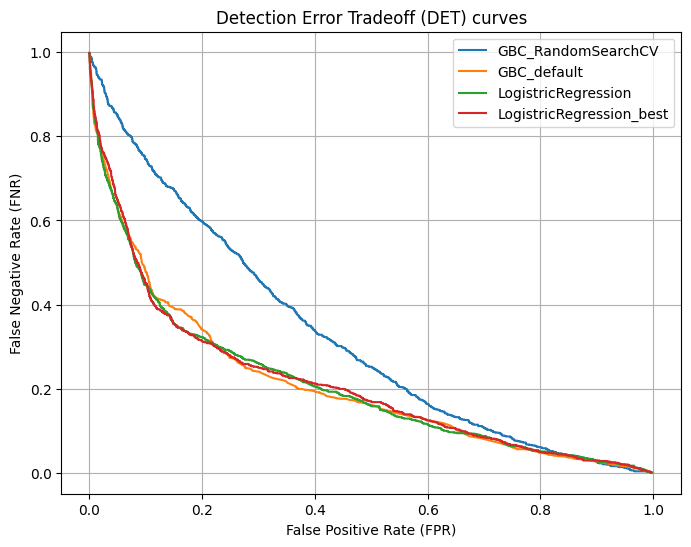

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import det_curve

def plot_det_curve_for_model(model, X_test, y_test, model_name):
    fpr, fnr, thresholds = det_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, fnr, label=model_name)

# Assuming you have a list of models named 'models_list', where each element is a tuple (model, model_name)
models_list = [(gbc_model_best, "GBC_RandomSearchCV"), (gbc_model, "GBC_default"), (lr_model, "LogistricRegression") , (lr_model_best, "LogistricRegression_best")]

# Plotting the DET curves for all models
plt.figure(figsize=(8, 6))
for model, model_name in models_list:
    plot_det_curve_for_model(model, X_test_transformed.toarray(), y_test, model_name)

# Additional customizations for the plot
plt.title("Detection Error Tradeoff (DET) curves")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("False Negative Rate (FNR)")
plt.legend()
plt.grid(True)
plt.show()


### Below code is to feed the whole dataset into the model built and summarize its probability by key features

In [68]:
X_transformed, y_transformed = pipeline['preprocessor'].fit_transform(X), y

y_pred_proba = pd.DataFrame(lr_model_best.predict_proba(X_transformed), columns=['Prob_0','Prob_1'])
y_pred_proba.index = X.index
X_with_proba = pd.concat([X, y_pred_proba], axis=1)
X_with_proba

,job,marital,education,loan,contact,month,poutcome,age,campaign,previous,cons.conf.idx,euribor3m,Prob_0,Prob_1
0,housemaid,married,basic.4y,no,telephone,may,nonexistent,56,1,0,-36.4,4.857,0.801043,0.198957
1,services,married,high.school,no,telephone,may,nonexistent,57,1,0,-36.4,4.857,0.788941,0.211059
2,services,married,high.school,no,telephone,may,nonexistent,37,1,0,-36.4,4.857,0.788657,0.211343
3,admin.,married,basic.6y,no,telephone,may,nonexistent,40,1,0,-36.4,4.857,0.776857,0.223143
4,services,married,high.school,yes,telephone,may,nonexistent,56,1,0,-36.4,4.857,0.809801,0.190199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,cellular,nov,nonexistent,73,1,0,-50.8,1.028,0.362201,0.637799
41184,blue-collar,married,professional.course,no,cellular,nov,nonexistent,46,1,0,-50.8,1.028,0.419781,0.580219
41185,retired,married,university.degree,no,cellular,nov,nonexistent,56,2,0,-50.8,1.028,0.342511,0.657489
41186,technician,married,professional.course,no,cellular,nov,nonexistent,44,1,0,-50.8,1.028,0.389753,0.610247


<Axes: xlabel='euribor3m', ylabel='Prob_1'>

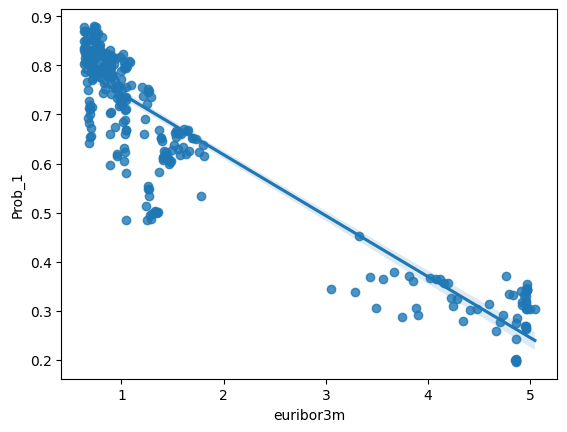

In [69]:
int_proba = X_with_proba.groupby('euribor3m', as_index=False)['Prob_1'].mean()
sns.regplot(data=int_proba, x='euribor3m', y='Prob_1')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'admin.'),
  Text(1, 0, 'blue-collar'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'housemaid'),
  Text(4, 0, 'management'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'self-employed'),
  Text(7, 0, 'services'),
  Text(8, 0, 'student'),
  Text(9, 0, 'technician'),
  Text(10, 0, 'unemployed')])

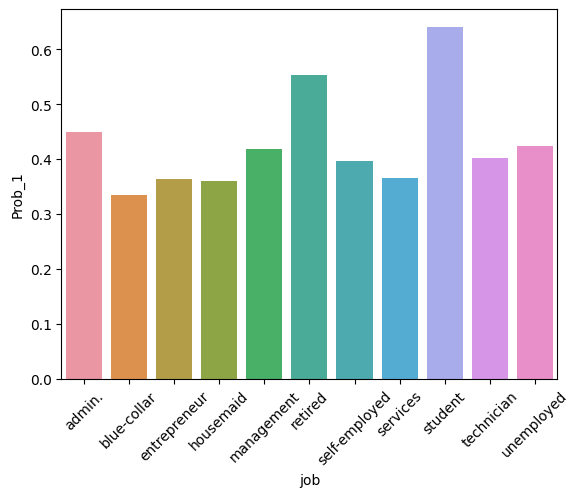

In [70]:
int_proba = X_with_proba.groupby('job', as_index=False)['Prob_1'].mean()
sns.barplot(data=int_proba, x='job', y='Prob_1')
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, 'cellular'), Text(1, 0, 'telephone')])

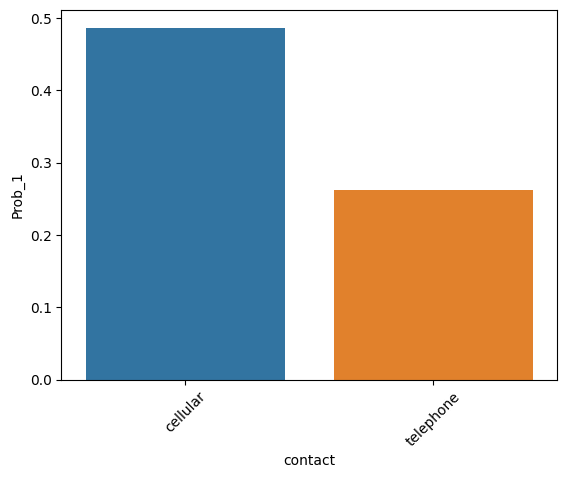

In [71]:
int_proba = X_with_proba.groupby('contact', as_index=False)['Prob_1'].mean()
sns.barplot(data=int_proba, x='contact', y='Prob_1')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77]),
 [Text(0, 0, '17'),
  Text(1, 0, '18'),
  Text(2, 0, '19'),
  Text(3, 0, '20'),
  Text(4, 0, '21'),
  Text(5, 0, '22'),
  Text(6, 0, '23'),
  Text(7, 0, '24'),
  Text(8, 0, '25'),
  Text(9, 0, '26'),
  Text(10, 0, '27'),
  Text(11, 0, '28'),
  Text(12, 0, '29'),
  Text(13, 0, '30'),
  Text(14, 0, '31'),
  Text(15, 0, '32'),
  Text(16, 0, '33'),
  Text(17, 0, '34'),
  Text(18, 0, '35'),
  Text(19, 0, '36'),
  Text(20, 0, '37'),
  Text(21, 0, '38'),
  Text(22, 0, '39'),
  Text(23, 0, '40'),
  Text(24, 0, '41'),
  Text(25, 0, '42'),
  Text(26, 0, '43'),
  Text(27, 0, '44'),
  Text(28, 0, '45'),
  Text(29, 0, '46'),
  Text(30, 0, '47'),
  Tex

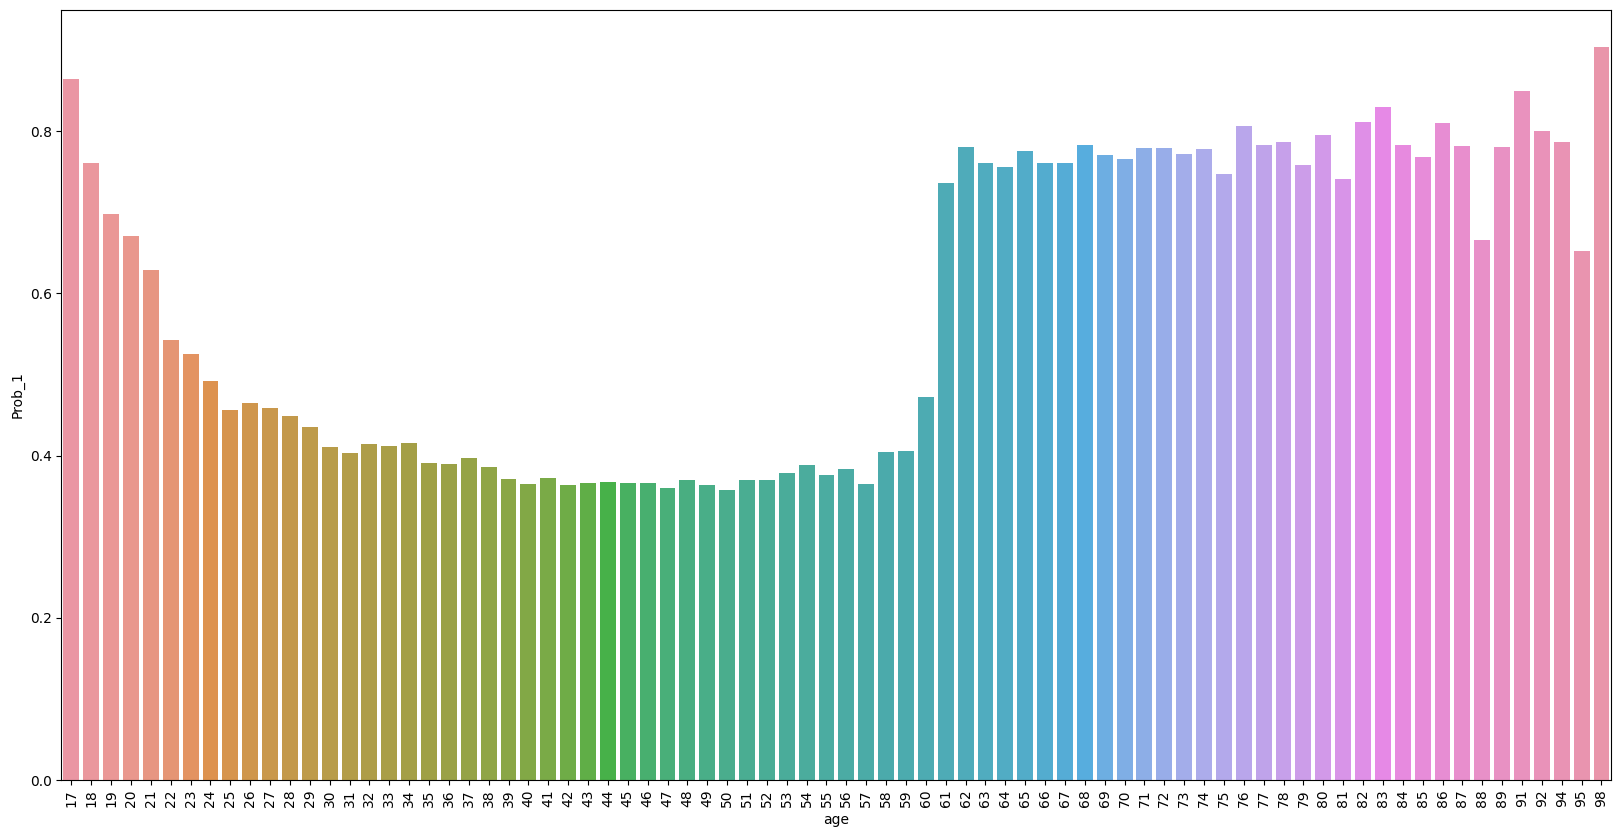

In [72]:
int_proba = X_with_proba.groupby('age', as_index=False)['Prob_1'].mean()
plt.figure(figsize=(20, 10))
sns.barplot(data=int_proba, x='age', y='Prob_1')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'basic.4y'),
  Text(1, 0, 'basic.6y'),
  Text(2, 0, 'basic.9y'),
  Text(3, 0, 'high.school'),
  Text(4, 0, 'illiterate'),
  Text(5, 0, 'professional.course'),
  Text(6, 0, 'university.degree')])

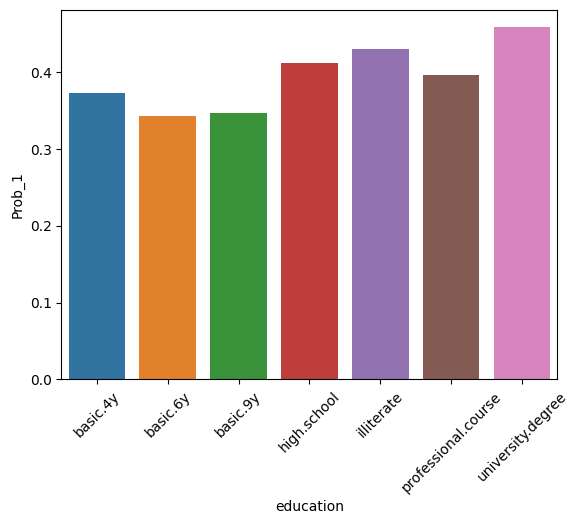

In [73]:
int_proba = X_with_proba.groupby('education', as_index=False)['Prob_1'].mean()
sns.barplot(data=int_proba, x='education', y='Prob_1')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'apr'),
  Text(1, 0, 'aug'),
  Text(2, 0, 'dec'),
  Text(3, 0, 'jul'),
  Text(4, 0, 'jun'),
  Text(5, 0, 'mar'),
  Text(6, 0, 'may'),
  Text(7, 0, 'nov'),
  Text(8, 0, 'oct'),
  Text(9, 0, 'sep')])

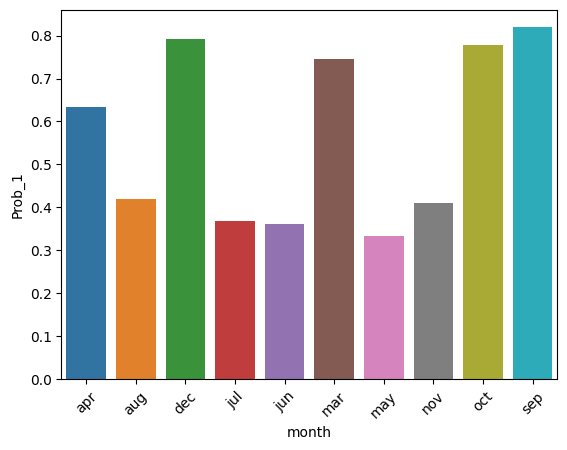

In [74]:
int_proba = X_with_proba.groupby('month', as_index=False)['Prob_1'].mean()
sns.barplot(data=int_proba, x='month', y='Prob_1')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7')])

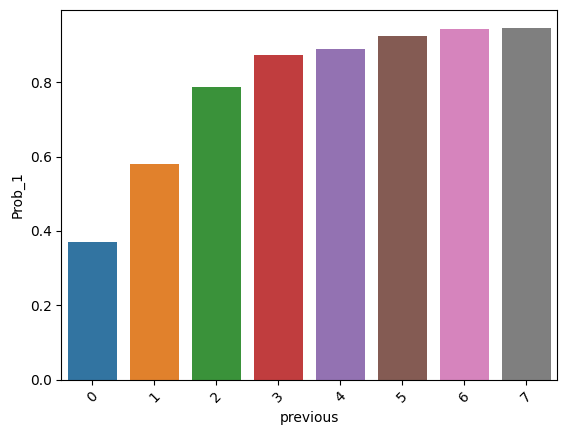

In [75]:
int_proba = X_with_proba.groupby('previous', as_index=False)['Prob_1'].mean()
sns.barplot(data=int_proba, x='previous', y='Prob_1')
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

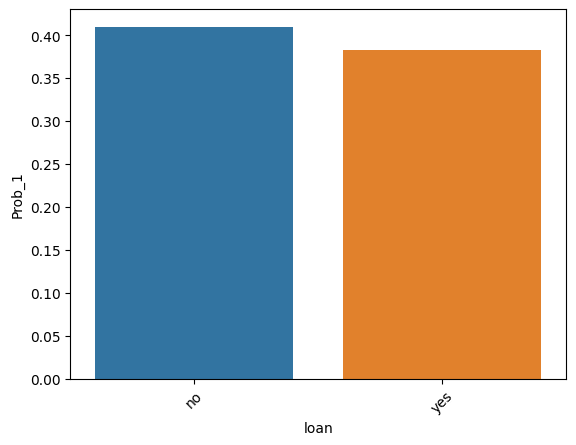

In [76]:
int_proba = X_with_proba.groupby('loan', as_index=False)['Prob_1'].mean()
sns.barplot(data=int_proba, x='loan', y='Prob_1')
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'divorced'), Text(1, 0, 'married'), Text(2, 0, 'single')])

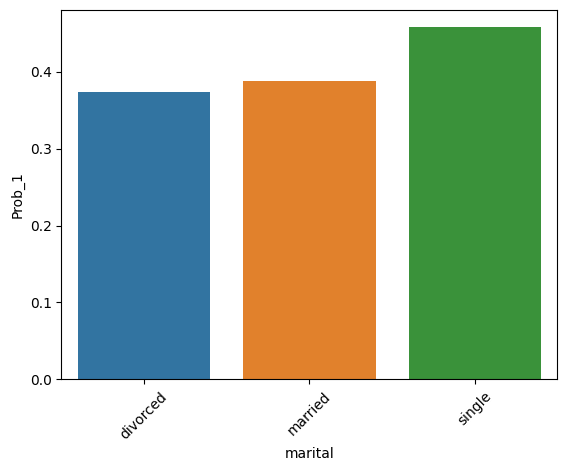

In [77]:
int_proba = X_with_proba.groupby('marital', as_index=False)['Prob_1'].mean()
sns.barplot(data=int_proba, x='marital', y='Prob_1')
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'failure'), Text(1, 0, 'nonexistent'), Text(2, 0, 'success')])

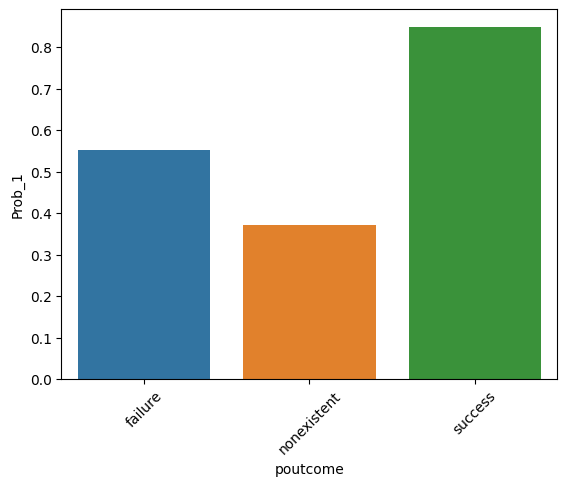

In [78]:
int_proba = X_with_proba.groupby('poutcome', as_index=False)['Prob_1'].mean()
sns.barplot(data=int_proba, x='poutcome', y='Prob_1')
plt.xticks(rotation=45)